# Overview

## Problem Statement

Oral cancer poses a growing threat to global health, especially in high-incidence regions such as India, Pakistan, Sri Lanka, and Taiwan. Early and accurate detection is crucial for improving survival rates and reducing the economic burden associated with late-stage diagnosis and treatment.
This dataset provides detailed information on individuals, including their demographics, lifestyle risk factors, clinical symptoms, cancer staging, and treatment details. The primary objective is to build a machine learning classification model that can accurately predict whether an individual has oral cancer based on these features.

## Objective

Develop a classification model that predicts the presence of oral cancer (Oral Cancer (Diagnosis) = Yes/No) using features such as:

Risk factors (e.g., tobacco, alcohol, HPV, betel quid use)

Symptoms (e.g., oral lesions, difficulty swallowing)

Clinical indicators (e.g., tumor size, cancer stage)

Demographic and lifestyle factors

## Undersatnding Data

This dataset is a structured compilation of real-world oral cancer cases across various regions, aiming to support early detection and risk prediction. It includes demographic, behavioral, clinical, and economic features.

### 🔹 Dataset Context

Source: Based on global health statistics and studies on oral cancer.

Purpose: Support machine learning models for classification and research into key risk factors and regional disparities.

Scope: Focused on high-incidence countries (India, Pakistan, Sri Lanka, Taiwan) and emerging cases in Western regions.

### 🔍 Target Variable

Oral Cancer (Diagnosis):

      Type: Categorical (Yes/No)

      Goal: Predict whether an individual is diagnosed with oral cancer.



### 🔑 Feature Overview


| Feature                          | Type                | Description                                                                 |
|----------------------------------|---------------------|-----------------------------------------------------------------------------|
| `ID`                             | Categorical (Unique)| Unique identifier for each record                                           |
| `Country`                        | Categorical         | Country of the individual                                                   |
| `Age`                            | Numerical           | Age of the individual                                                       |
| `Gender`                         | Categorical         | Biological sex (`Male`/`Female`)                                            |
| `Tobacco Use`                    | Binary              | History of tobacco use (`Yes`/`No`)                                         |
| `Alcohol Consumption`           | Binary              | History of alcohol use (`Yes`/`No`)                                         |
| `HPV Infection`                  | Binary              | Presence of HPV infection (`Yes`/`No`)                                      |
| `Betel Quid Use`                 | Binary              | Use of betel quid, a known carcinogen in some regions                      |
| `Chronic Sun Exposure`          | Binary              | Extended exposure to sunlight, especially affecting the lips               |
| `Poor Oral Hygiene`             | Binary              | Overall oral health condition                                               |
| `Diet (Fruits & Vegetables Intake)` | Ordinal (Low/Moderate/High) | Diet quality in terms of fruit & vegetable consumption      |
| `Family History of Cancer`       | Binary              | Indicates genetic predisposition                                            |
| `Compromised Immune System`     | Binary              | Indicates if the person has a weakened immune system                        |
| `Oral Lesions`                  | Binary              | Presence of visible oral lesions                                            |
| `Unexplained Bleeding`          | Binary              | Bleeding without known cause                                                |
| `Difficulty Swallowing`         | Binary              | A symptom often linked to more advanced cancer                             |
| `White or Red Patches in Mouth` | Binary              | Warning signs of potential pre-cancerous changes                            |
| `Tumor Size (cm)`               | Numerical           | Size of the tumor in centimeters                                            |
| `Cancer Stage`                  | Ordinal (0–4)       | Stage of cancer (0 = No cancer)                                             |
| `Treatment Type`                | Categorical         | Type of treatment (Surgery, Radiation, Chemotherapy, etc.)                 |
| `Survival Rate (5-Year, %)`     | Numerical           | Probability of surviving 5 years post-diagnosis                             |
| `Cost of Treatment (USD)`       | Numerical           | Treatment cost in US dollars                                                |
| `Economic Burden (Lost Workdays)` | Numerical         | Estimated number of workdays lost annually                                  |
| `Early Diagnosis`               | Binary              | Indicates whether diagnosis occurred in early stage                         |
| `Oral Cancer (Diagnosis)`       | Binary (Target)     | Target variable — whether the individual has oral cancer (`Yes


### 🧠 Insights to Explore
Class Balance: Check the distribution of cancer diagnosis (Yes vs. No).

Risk Factor Correlation: Which factors (e.g., tobacco, HPV, oral hygiene) are most associated with cancer cases?

Geographic Variation: Which countries have the highest incidence?

Stage & Size Analysis: How do tumor size and cancer stage relate to diagnosis and survival rate?

Economic Burden: Explore how cost and work loss vary with diagnosis and treatment type.



# Milestone 01

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

2025-05-16 10:41:08.289880: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747392068.547337      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747392068.614550      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Load Data

In [2]:
df = pd.read_csv('/kaggle/input/oral-cancer-prediction-dataset/oral_cancer_prediction_dataset.csv')
df.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,...,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,...,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,...,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,...,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,...,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [3]:
# Drop the ID column
df.drop(columns=['ID'],inplace=True)

## Inspect Data

In [4]:
df.shape   #84922 Rows, 24 Columns

(84922, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84922 entries, 0 to 84921
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   84922 non-null  object 
 1   Age                                       84922 non-null  int64  
 2   Gender                                    84922 non-null  object 
 3   Tobacco Use                               84922 non-null  object 
 4   Alcohol Consumption                       84922 non-null  object 
 5   HPV Infection                             84922 non-null  object 
 6   Betel Quid Use                            84922 non-null  object 
 7   Chronic Sun Exposure                      84922 non-null  object 
 8   Poor Oral Hygiene                         84922 non-null  object 
 9   Diet (Fruits & Vegetables Intake)         84922 non-null  object 
 10  Family History of Cancer          

In [6]:
df.describe()

,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


In [7]:
df.describe(include='O')

,Country,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Treatment Type,Early Diagnosis,Oral Cancer (Diagnosis)
count,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922,84922
unique,17,2,2,2,2,2,2,2,3,2,2,2,2,2,2,5,2,2
top,India,Male,Yes,Yes,No,No,No,No,Moderate,No,No,No,No,No,No,No Treatment,Yes,No
freq,8079,60351,67989,50939,59525,60299,68057,42627,33914,76508,76368,59419,67891,63709,55103,51016,46508,42573


In [8]:
df.isna().sum()

Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)                     0
Economic Burden (Lost Workdays per

In [9]:
df.duplicated().sum()

1390

In [10]:
df.columns

Index(['Country', 'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Cancer Stage',
       'Treatment Type', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Early Diagnosis', 'Oral Cancer (Diagnosis)'],
      dtype='object')

In [11]:
df.dtypes

Country                                      object
Age                                           int64
Gender                                       object
Tobacco Use                                  object
Alcohol Consumption                          object
HPV Infection                                object
Betel Quid Use                               object
Chronic Sun Exposure                         object
Poor Oral Hygiene                            object
Diet (Fruits & Vegetables Intake)            object
Family History of Cancer                     object
Compromised Immune System                    object
Oral Lesions                                 object
Unexplained Bleeding                         object
Difficulty Swallowing                        object
White or Red Patches in Mouth                object
Tumor Size (cm)                             float64
Cancer Stage                                  int64
Treatment Type                               object
Survival Rat

In [12]:
df.nunique()

Country                                        17
Age                                            83
Gender                                          2
Tobacco Use                                     2
Alcohol Consumption                             2
HPV Infection                                   2
Betel Quid Use                                  2
Chronic Sun Exposure                            2
Poor Oral Hygiene                               2
Diet (Fruits & Vegetables Intake)               3
Family History of Cancer                        2
Compromised Immune System                       2
Oral Lesions                                    2
Unexplained Bleeding                            2
Difficulty Swallowing                           2
White or Red Patches in Mouth                   2
Tumor Size (cm)                             42350
Cancer Stage                                    5
Treatment Type                                  5
Survival Rate (5-Year, %)                   42350


### Report1.1
Data Doesn't have any missing values.

Data has 1390 duplicated records.

Data types are okay.

In [13]:
df['Oral Cancer (Diagnosis)'].value_counts()  # 0: No, 1: Yes
# balanced dataset

Oral Cancer (Diagnosis)
No     42573
Yes    42349
Name: count, dtype: int64

In [14]:
df['Early Diagnosis'].value_counts()  

Early Diagnosis
Yes    46508
No     38414
Name: count, dtype: int64

In [15]:
df['Treatment Type'].value_counts()   #logic

Treatment Type
No Treatment        51016
Chemotherapy         8529
Surgery              8500
Targeted Therapy     8465
Radiation            8412
Name: count, dtype: int64

In [16]:
df['Cost of Treatment (USD)'].value_counts()   #problem#   must be 0.00 -> 49626 

Cost of Treatment (USD)
0.00        42573
89895.00        5
41902.50        5
45510.00        5
41377.50        4
            ...  
38471.25        1
57396.25        1
78699.00        1
66067.75        1
65002.00        1
Name: count, Length: 37235, dtype: int64

In [17]:
df['Cancer Stage'].value_counts()  #perfect

Cancer Stage
0    42573
2    12865
1    12713
3    10520
4     6251
Name: count, dtype: int64

In [18]:
df['Tumor Size (cm)'].value_counts()  #perfect

Tumor Size (cm)
0.000000    42573
3.704561        1
2.641649        1
1.661544        1
4.716437        1
            ...  
3.485131        1
1.454348        1
2.939073        1
2.918210        1
5.901425        1
Name: count, Length: 42350, dtype: int64

In [19]:
df['Survival Rate (5-Year, %)'].value_counts()  #perfect

Survival Rate (5-Year, %)
100.000000    42573
49.037459         1
49.032400         1
68.622313         1
60.601198         1
              ...  
37.365120         1
67.486029         1
80.223621         1
30.815936         1
21.777636         1
Name: count, Length: 42350, dtype: int64

## Data Cleaning

In [20]:
df.drop_duplicates(inplace=True)   #drop duplicates

In [21]:
df.columns

Index(['Country', 'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Cancer Stage',
       'Treatment Type', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Early Diagnosis', 'Oral Cancer (Diagnosis)'],
      dtype='object')

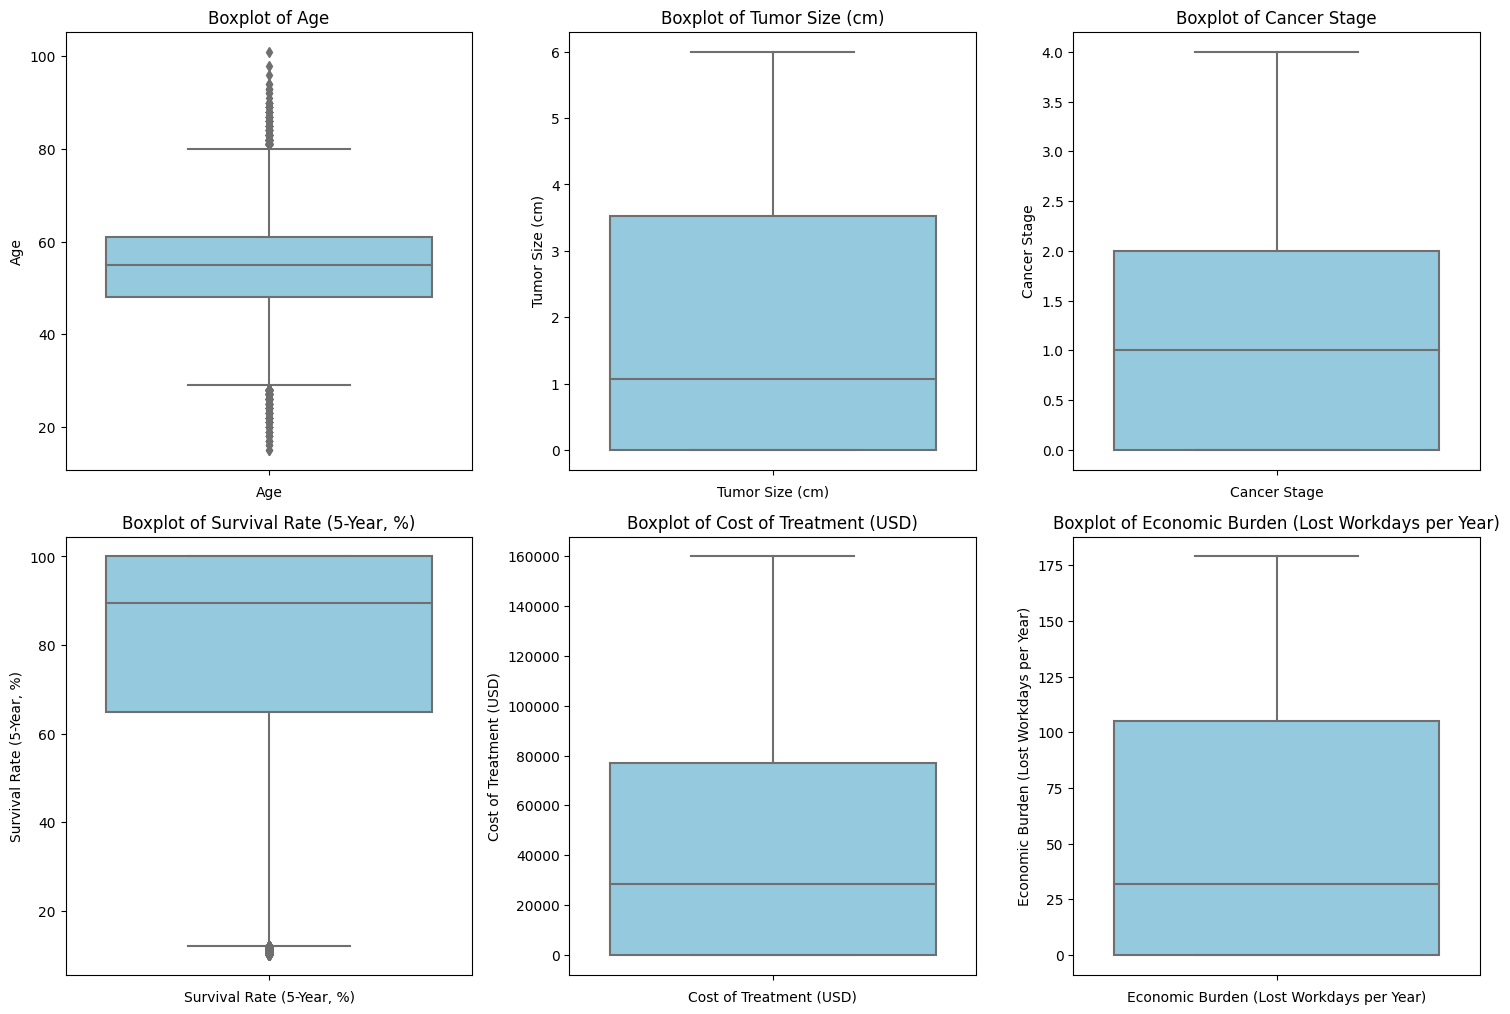

In [22]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=axes[i], color='skyblue') 
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [23]:
# Detect Outliers
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [24]:
for col in numeric_columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    print(f"Outliers in {col}:")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}")
    print('\n')

Outliers in Age:
Lower Bound: 28.5
Upper Bound: 80.5
Number of Outliers: 817


Outliers in Tumor Size (cm):
Lower Bound: -5.292683972484418
Upper Bound: 8.821139954140696
Number of Outliers: 0


Outliers in Cancer Stage:
Lower Bound: -3.0
Upper Bound: 5.0
Number of Outliers: 0


Outliers in Survival Rate (5-Year, %):
Lower Bound: 12.032854624169325
Upper Bound: 152.7802872254984
Number of Outliers: 653


Outliers in Cost of Treatment (USD):
Lower Bound: -115785.46875
Upper Bound: 192975.78125
Number of Outliers: 0


Outliers in Economic Burden (Lost Workdays per Year):
Lower Bound: -157.5
Upper Bound: 262.5
Number of Outliers: 0




In [25]:
def plot_outliers(df, column, lower_bound, upper_bound):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column], color='skyblue')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.legend()
    plt.title(f"Boxplot of {column}")

    plt.subplot(1, 2, 2)
    sns.histplot(df[column], bins=30, kde=True, color='green')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.legend(loc='upper right')
    plt.title(f"Distribution of {column}")

    plt.tight_layout()
    plt.show()


In [26]:
def outlier_analyzer(df, column):
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    n_outliers = len(outliers)
    n_total = len(df)

    print(f"Total observations: {n_total}")
    print(f"Number of Outliers: {n_outliers} ({n_outliers/n_total:.2%})")
    
    plot_outliers(df, column, lower_bound, upper_bound)

    return outliers

Total observations: 83532
Number of Outliers: 817 (0.98%)


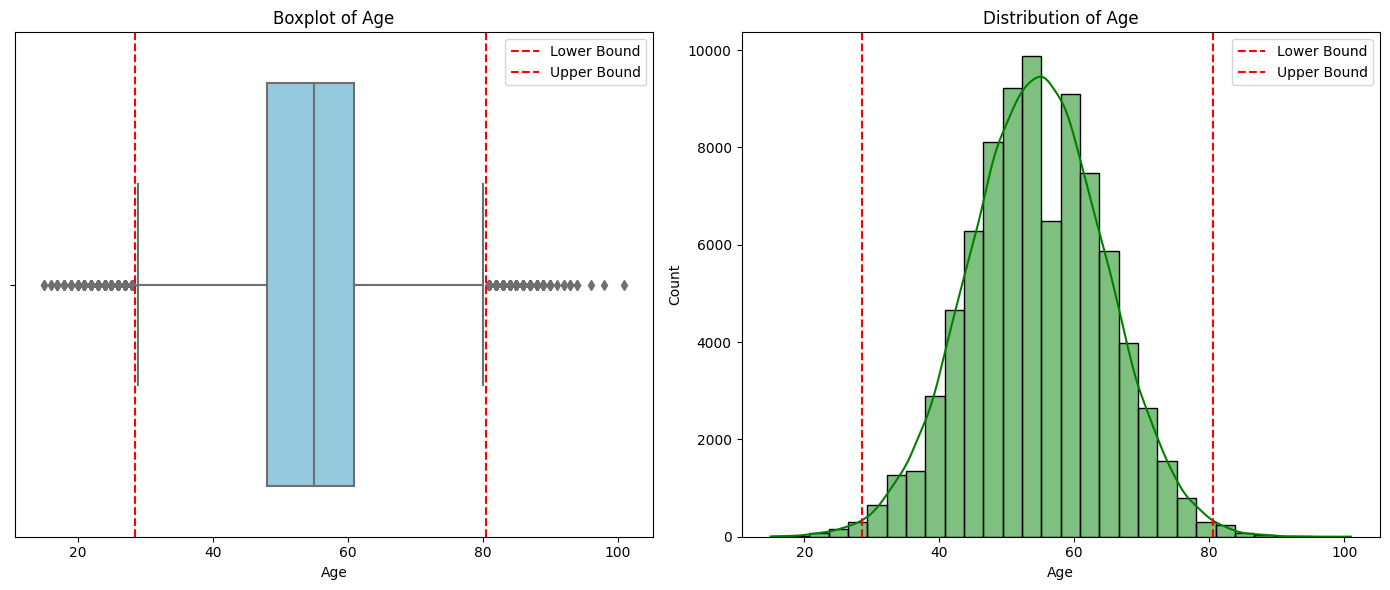

Total observations: 83532
Number of Outliers: 0 (0.00%)


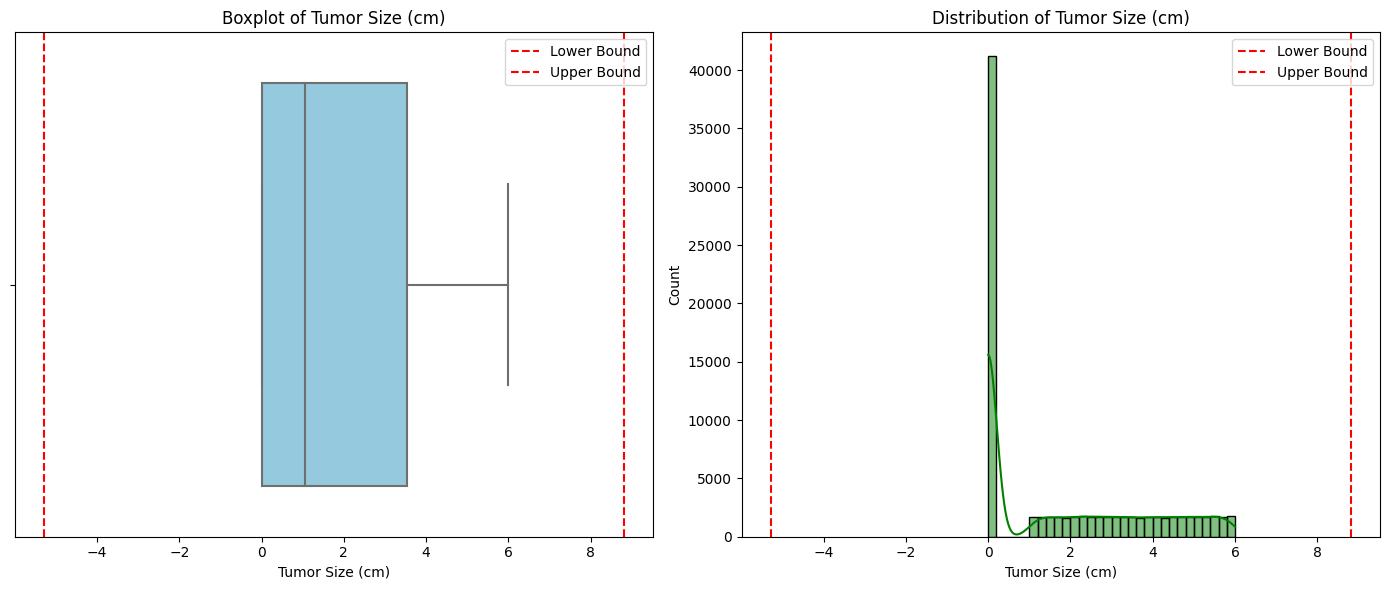

Total observations: 83532
Number of Outliers: 0 (0.00%)


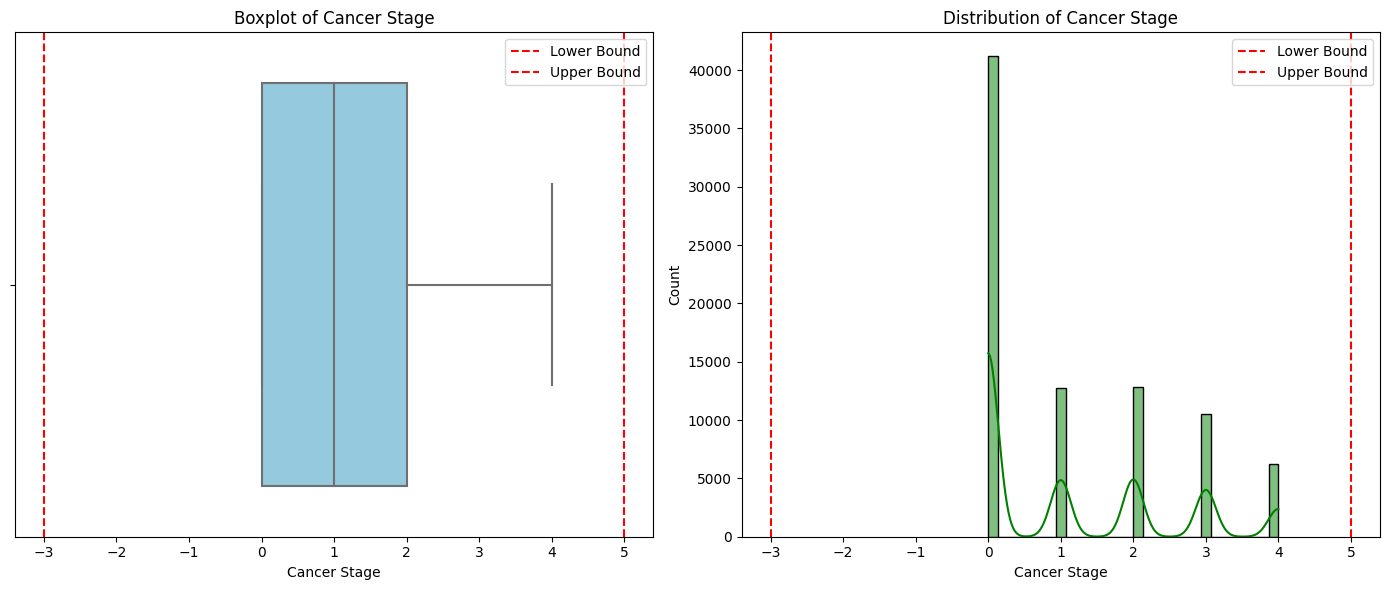

Total observations: 83532
Number of Outliers: 653 (0.78%)


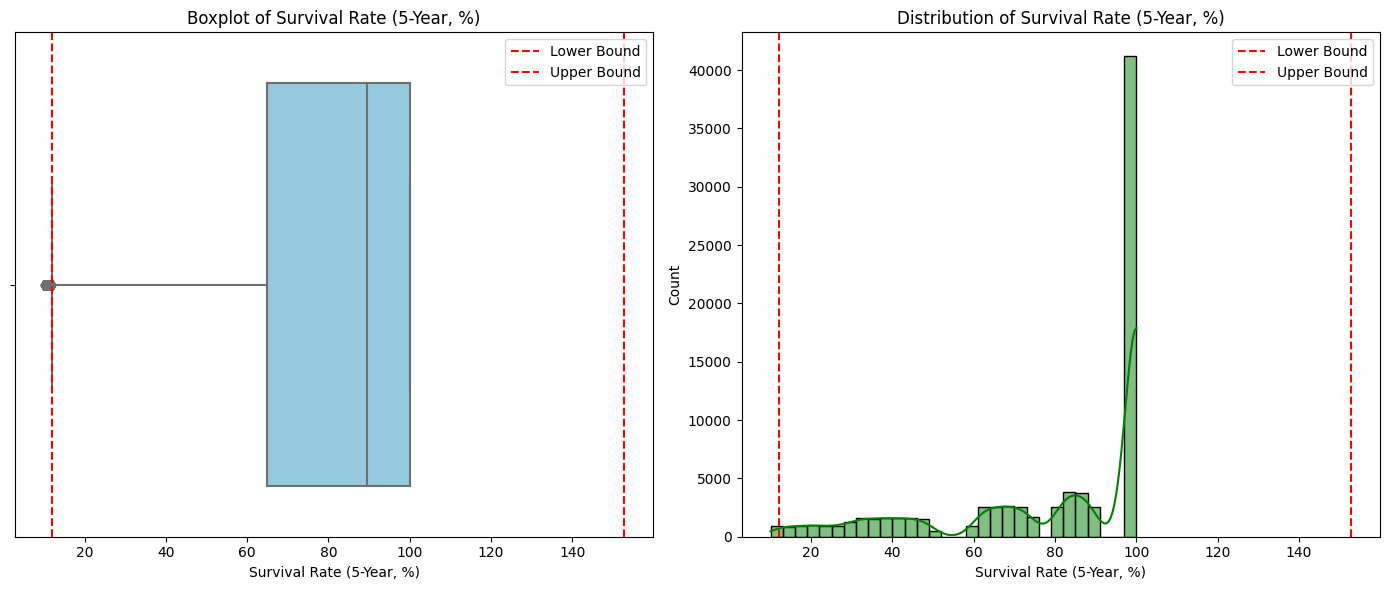

Total observations: 83532
Number of Outliers: 0 (0.00%)


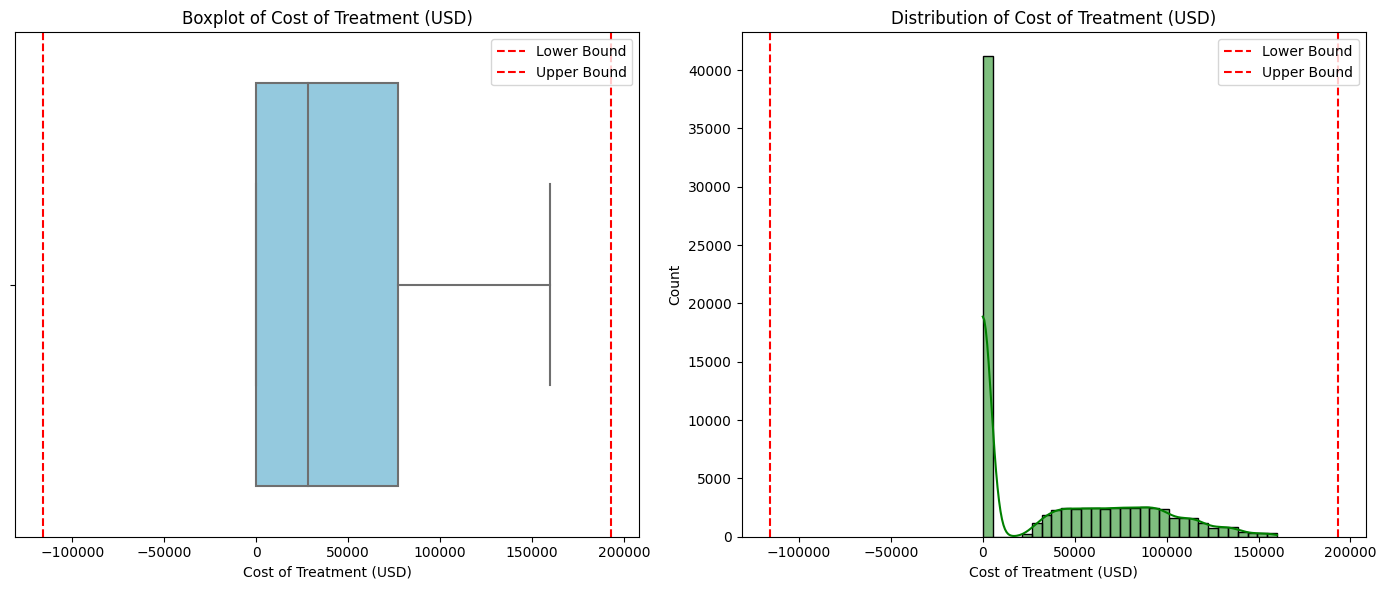

Total observations: 83532
Number of Outliers: 0 (0.00%)


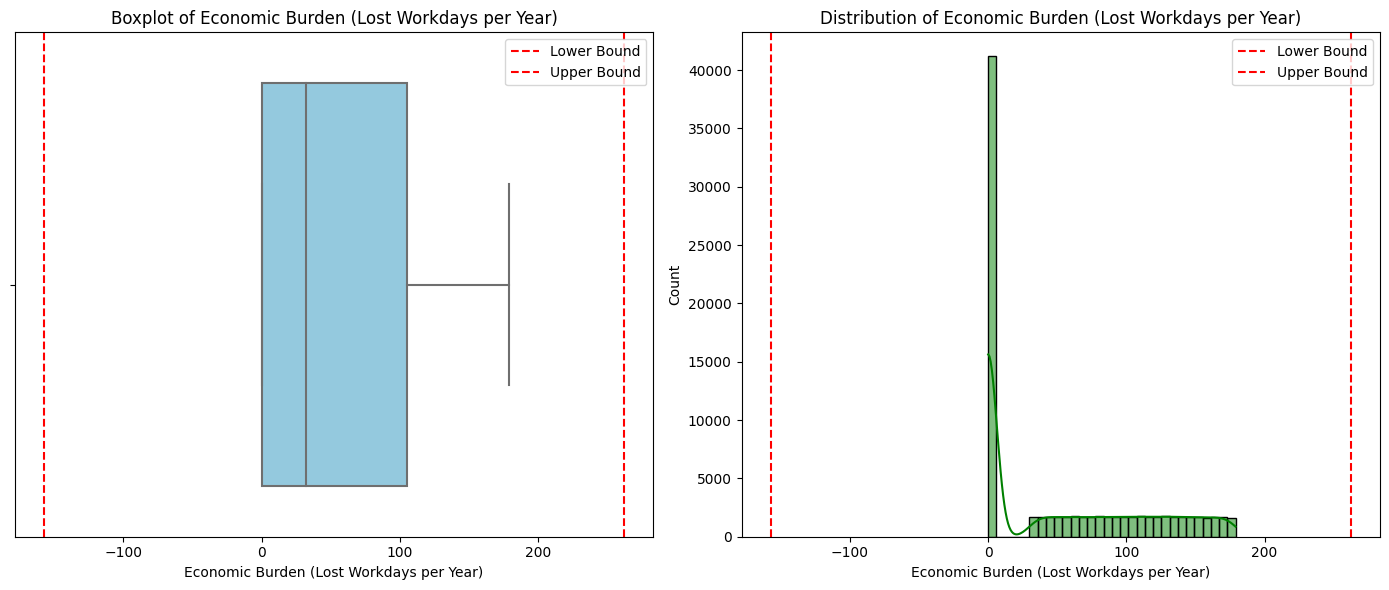

In [27]:
for col in numeric_columns:
    outliers_cost = outlier_analyzer(df, col)

### drop outliers

In [28]:
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

Total observations: 82048
Number of Outliers: 0 (0.00%)


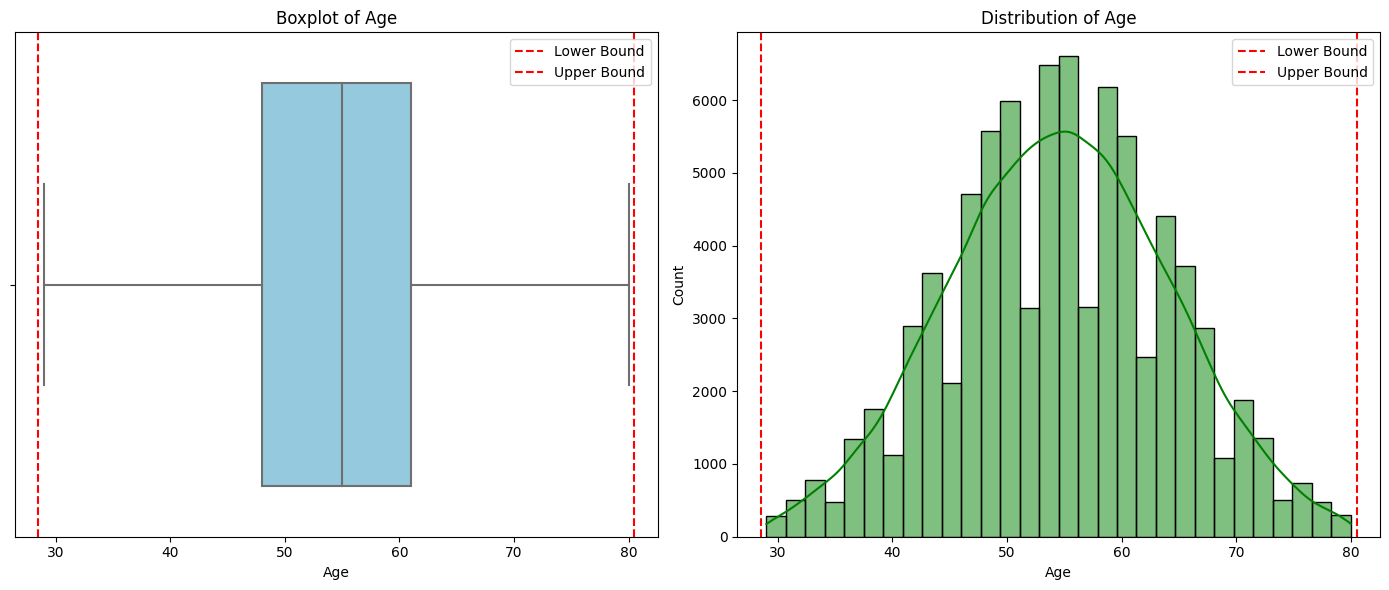

Total observations: 82048
Number of Outliers: 0 (0.00%)


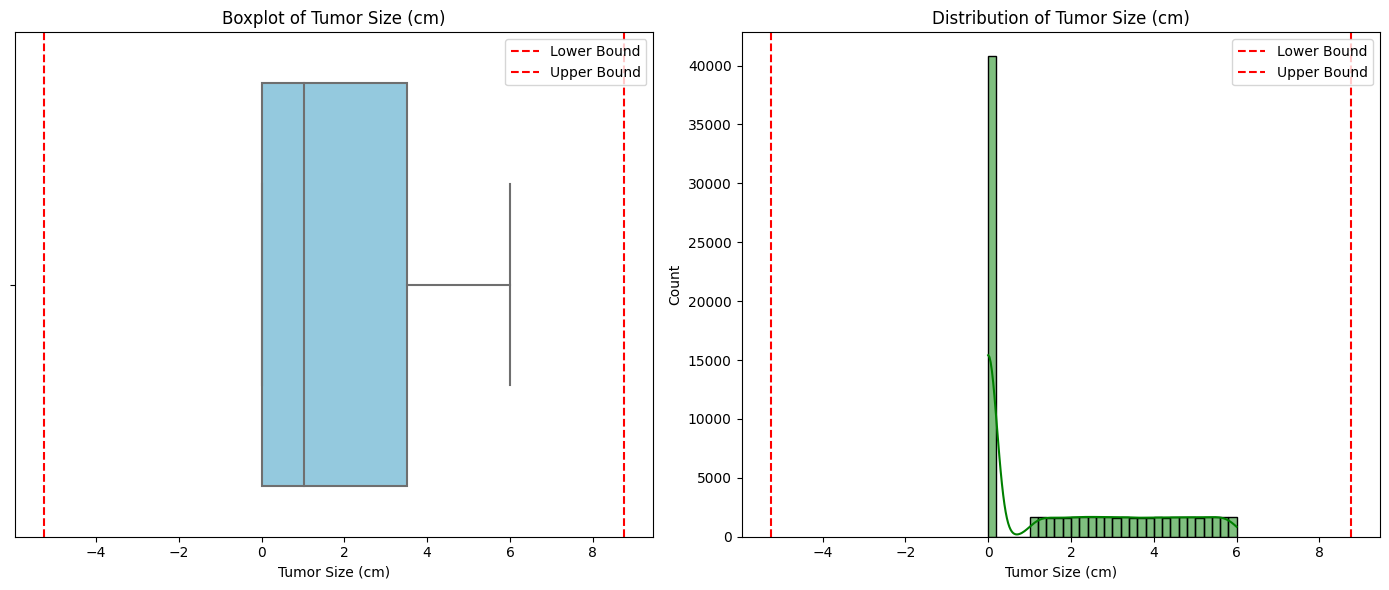

Total observations: 82048
Number of Outliers: 0 (0.00%)


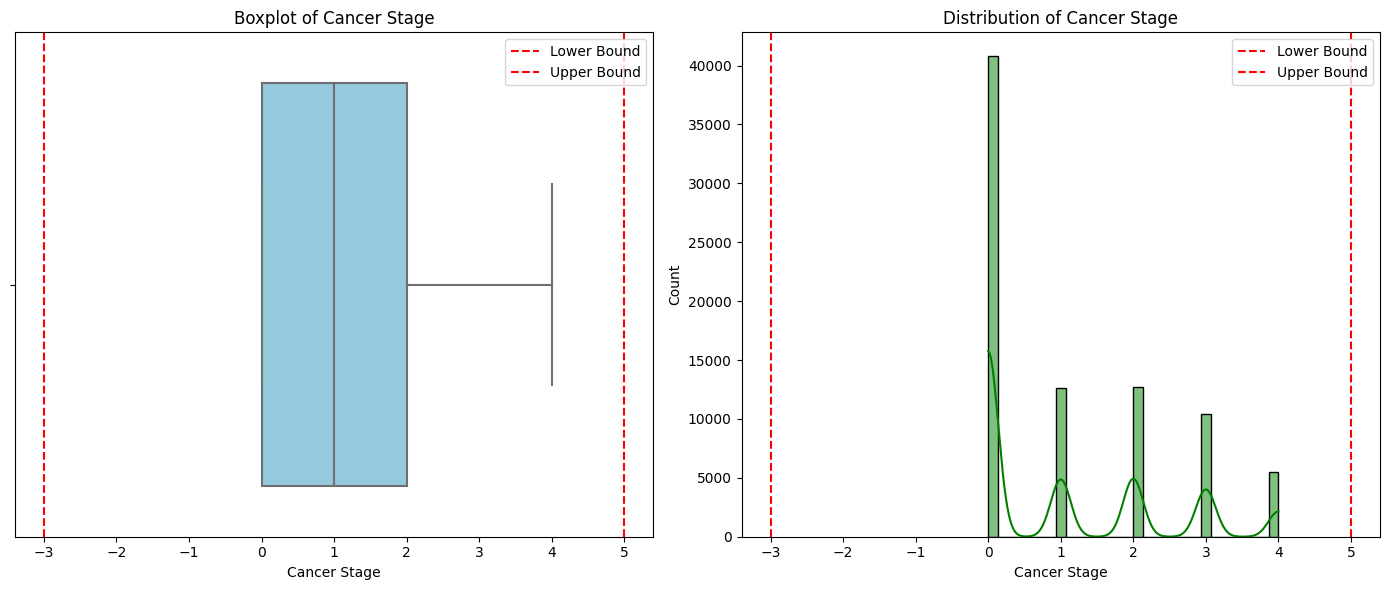

Total observations: 82048
Number of Outliers: 427 (0.52%)


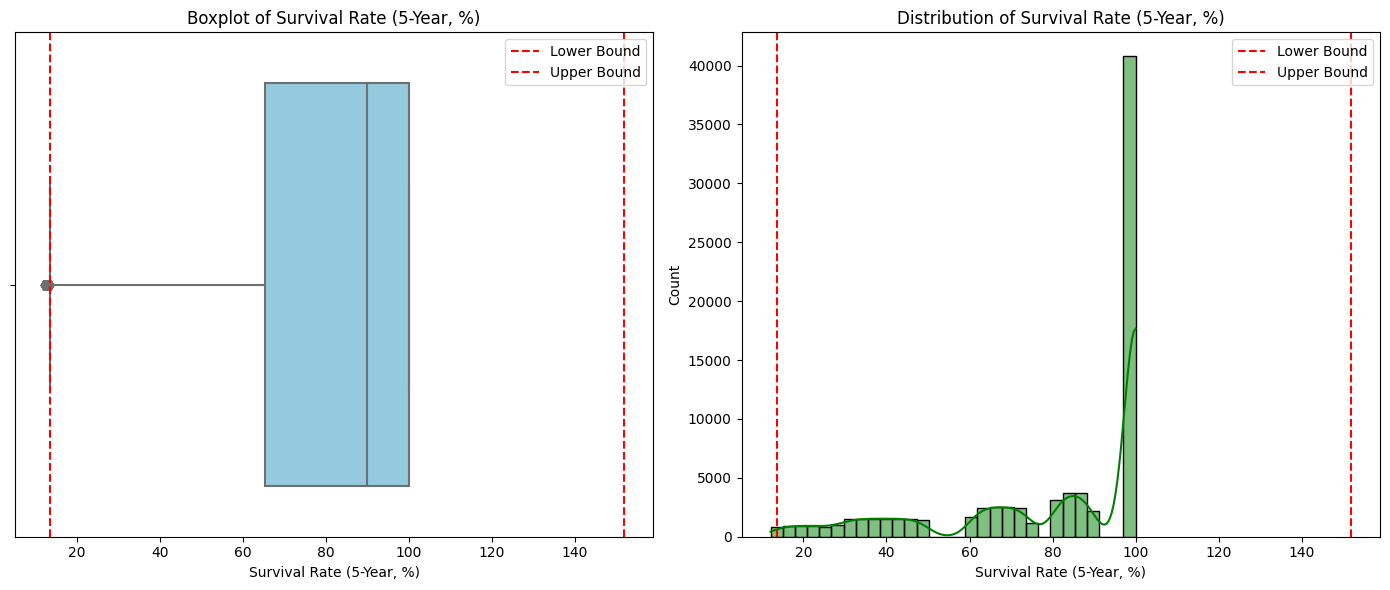

Total observations: 82048
Number of Outliers: 0 (0.00%)


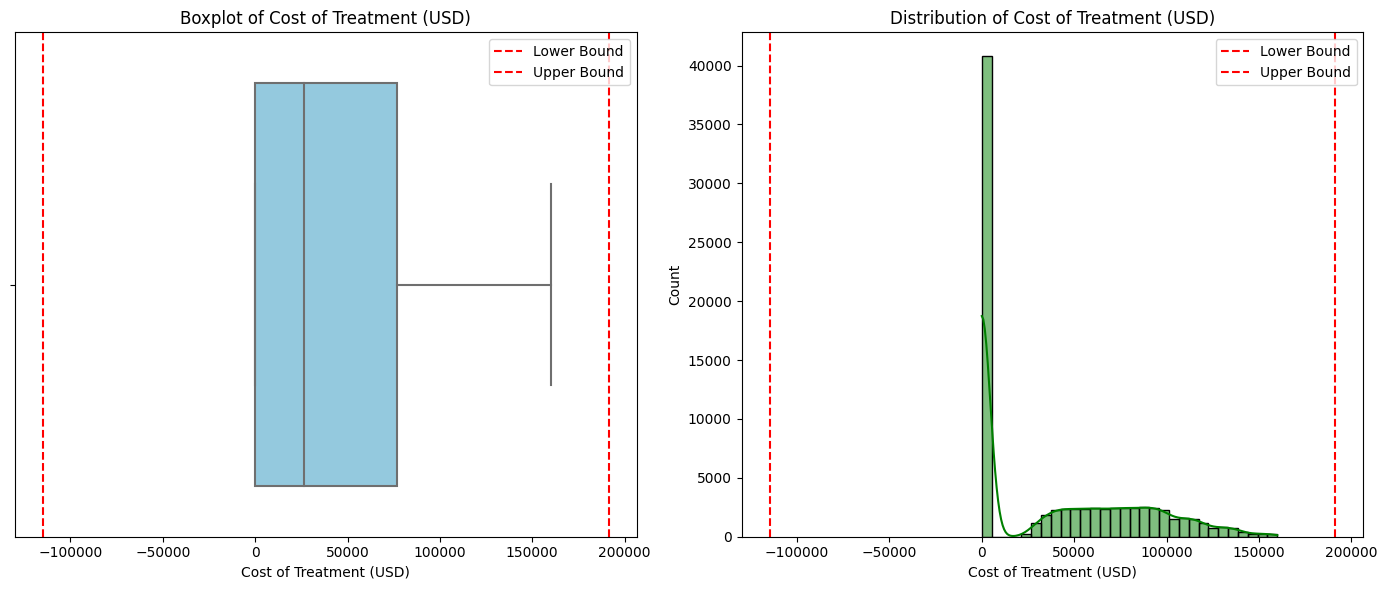

Total observations: 82048
Number of Outliers: 0 (0.00%)


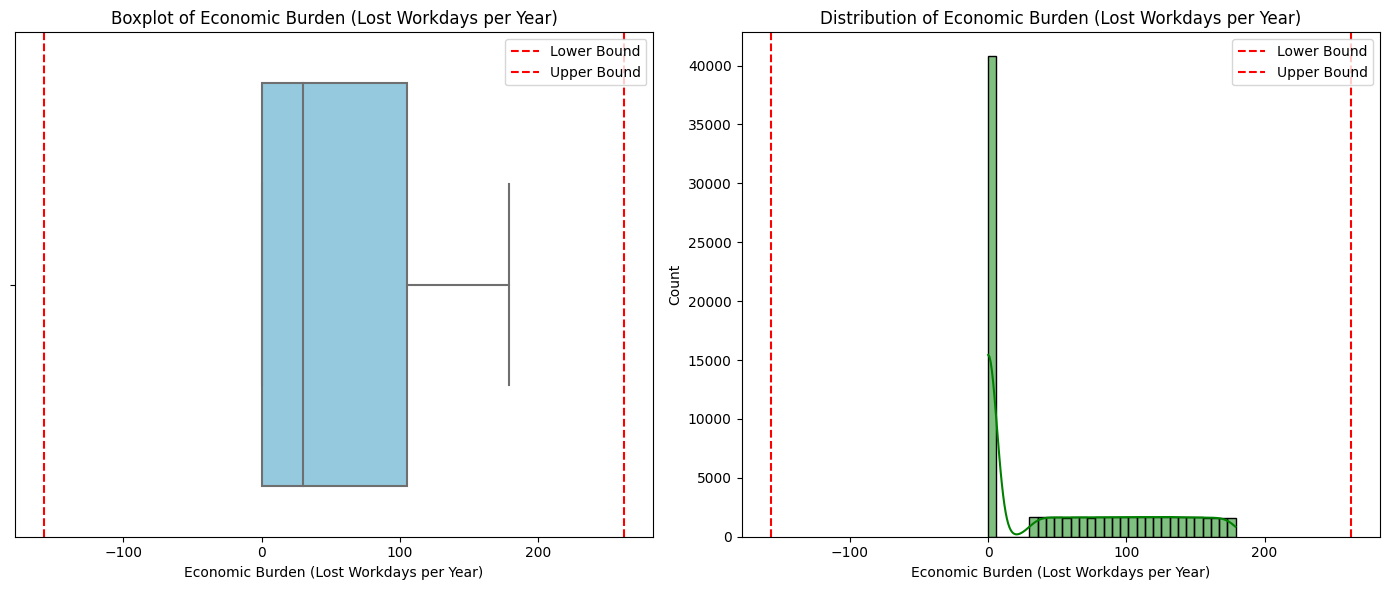

In [29]:
for col in numeric_columns:
    outliers_cost = outlier_analyzer(df, col)
    

## Exploratory Data Analysis (EDA)

In [30]:
def plot_features_subplots(df, features, hue_col, plot_type='count', n_cols=3, figsize=(20, 15)):
    n_rows = math.ceil(len(features) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(features):
        if plot_type == 'count':
            sns.countplot(data=df, x=col, hue=hue_col, ax=axes[i])
            #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
        elif plot_type == 'box':
            sns.boxplot(data=df, x=col, y=hue_col, ax=axes[i])
            #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
        elif plot_type == 'histplot':
            sns.histplot(data=df, x=col, hue=hue_col, ax=axes[i],kde=True)
        axes[i].set_title(col)
        axes[i].legend(loc='upper right')
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

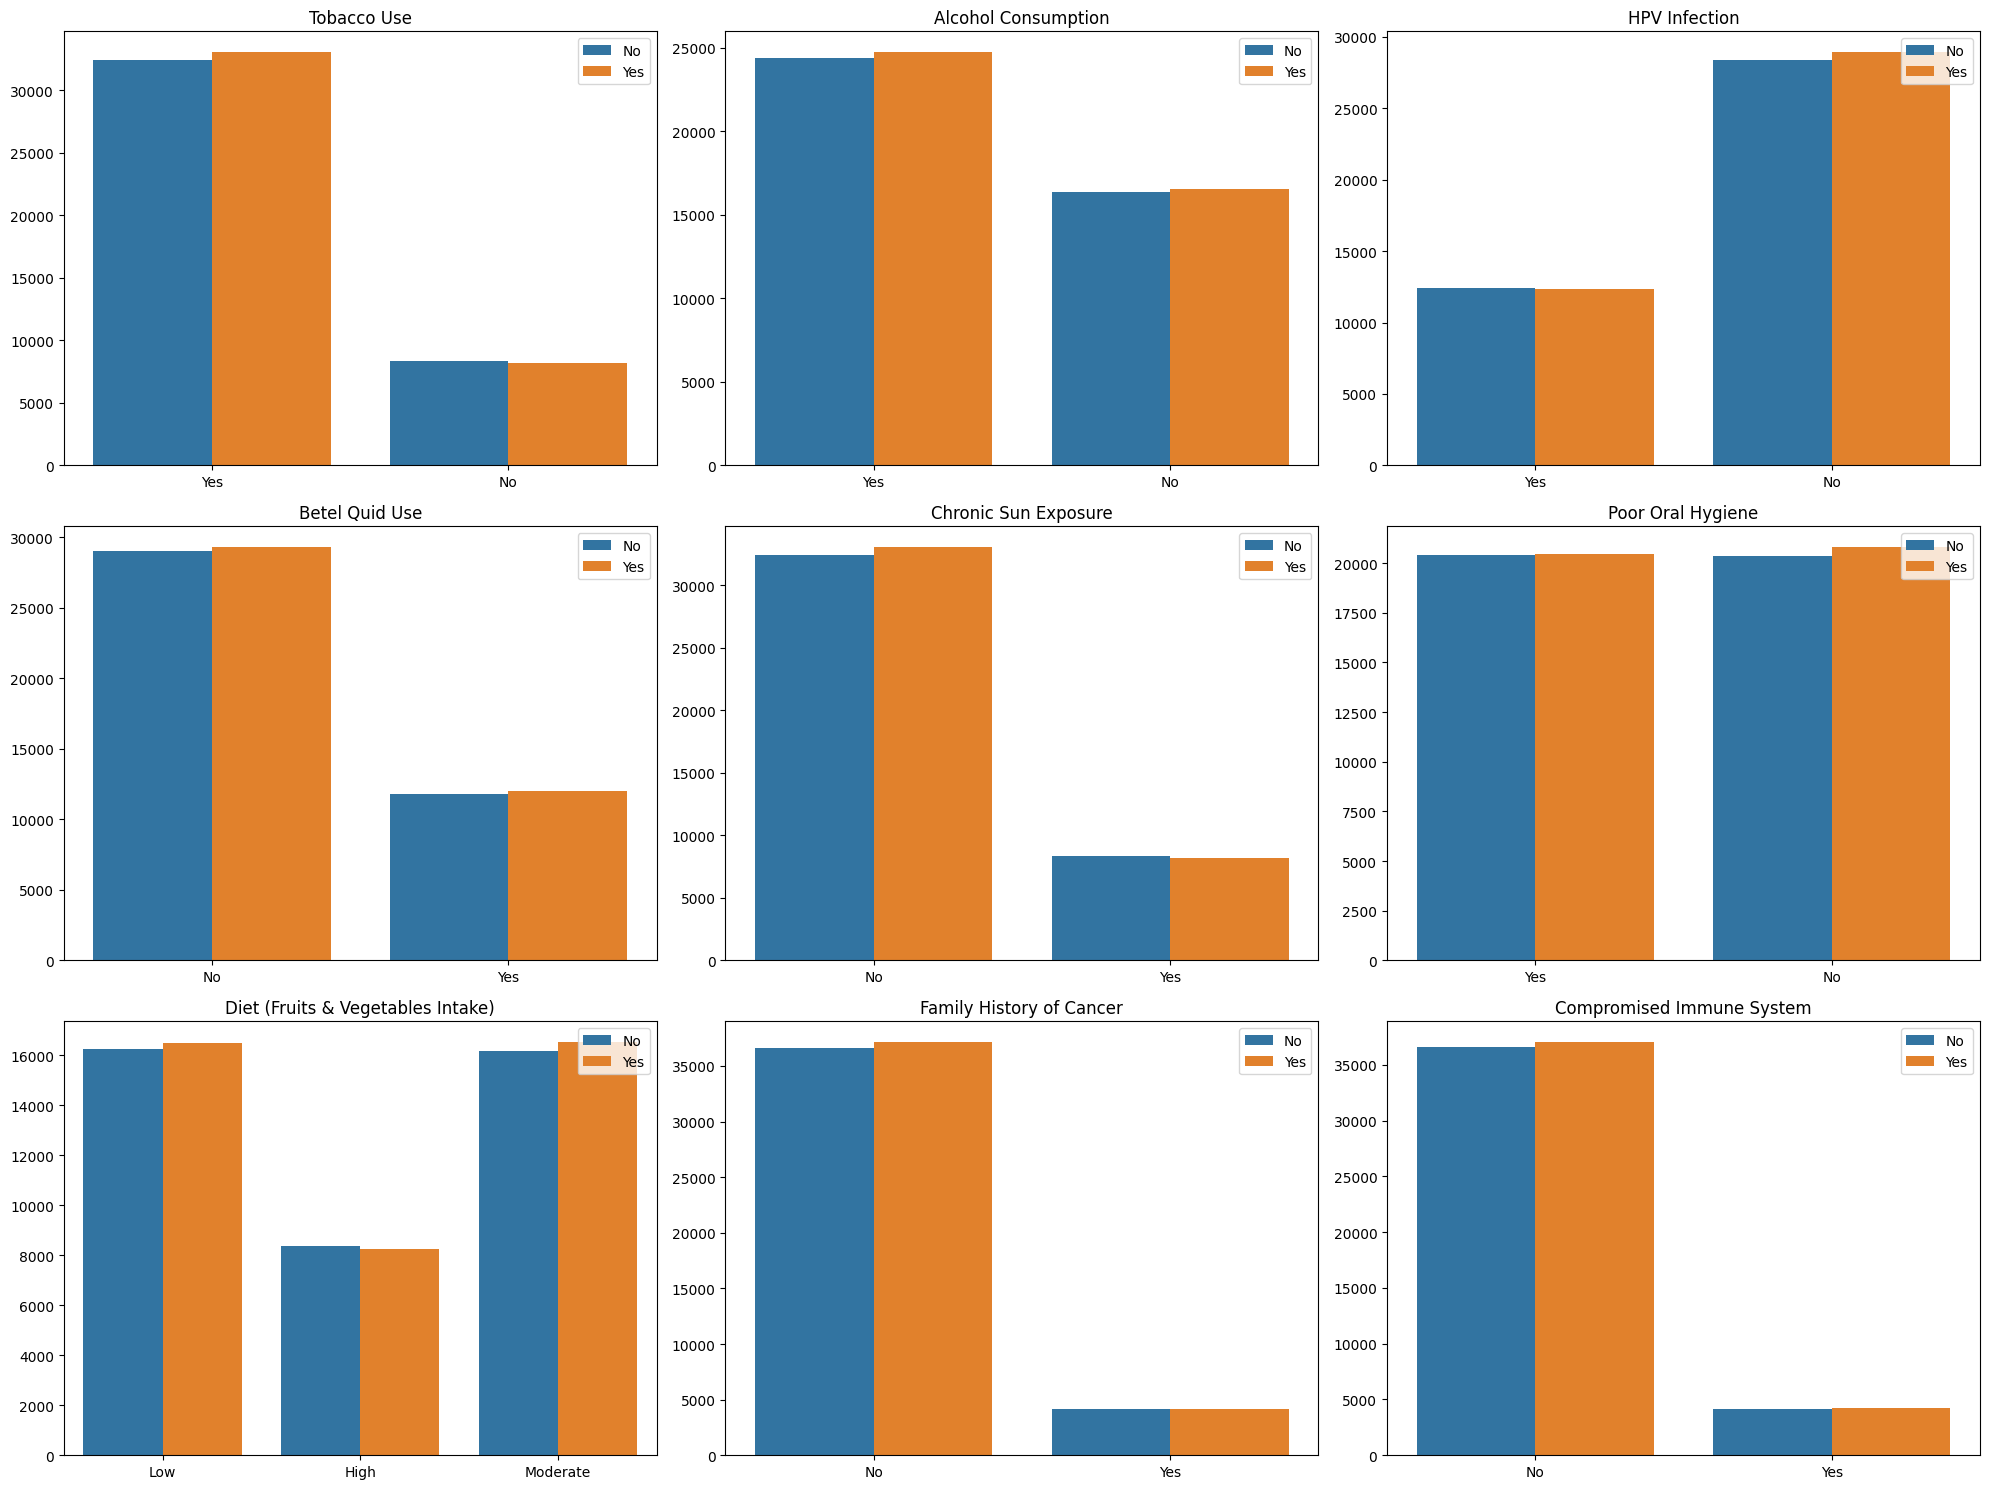

In [31]:

# Plotting the risk factors with Oral Cancer Diagnosis
risk_cols = ['Tobacco Use', 'Alcohol Consumption', 'HPV Infection', 'Betel Quid Use',
             'Chronic Sun Exposure', 'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
             'Family History of Cancer', 'Compromised Immune System']

plot_features_subplots(df,risk_cols,hue_col="Oral Cancer (Diagnosis)")

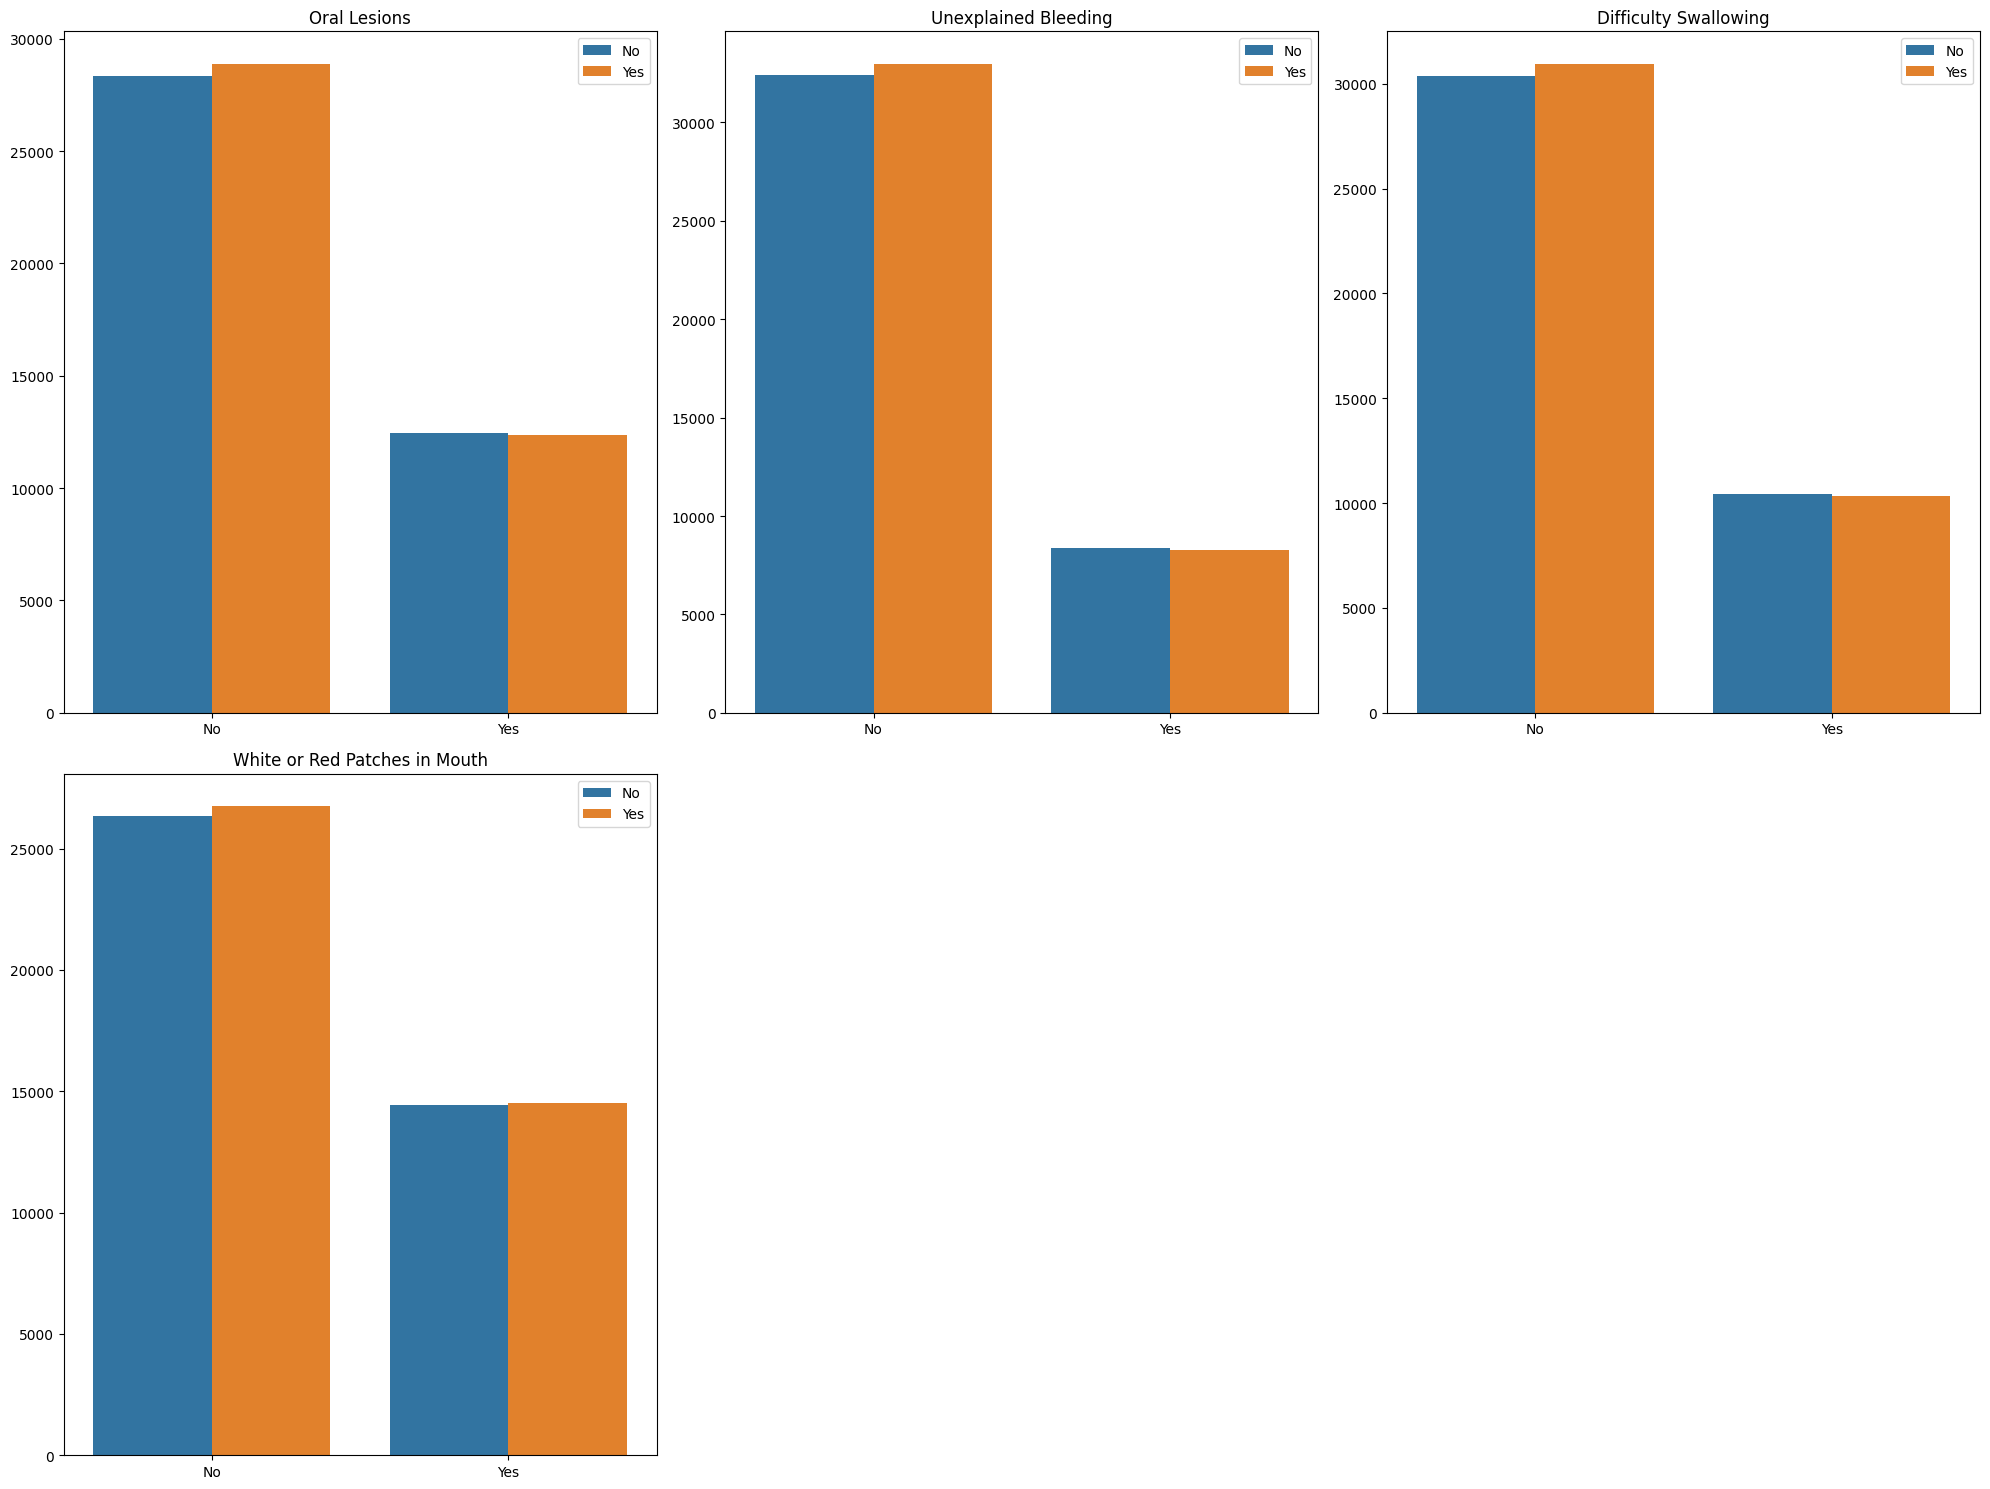

In [32]:
# plotting the symptoms with Oral Cancer Diagnosis
symptom_cols = ['Oral Lesions', 'Unexplained Bleeding', 'Difficulty Swallowing',
                'White or Red Patches in Mouth']

plot_features_subplots(df,symptom_cols,hue_col="Oral Cancer (Diagnosis)")

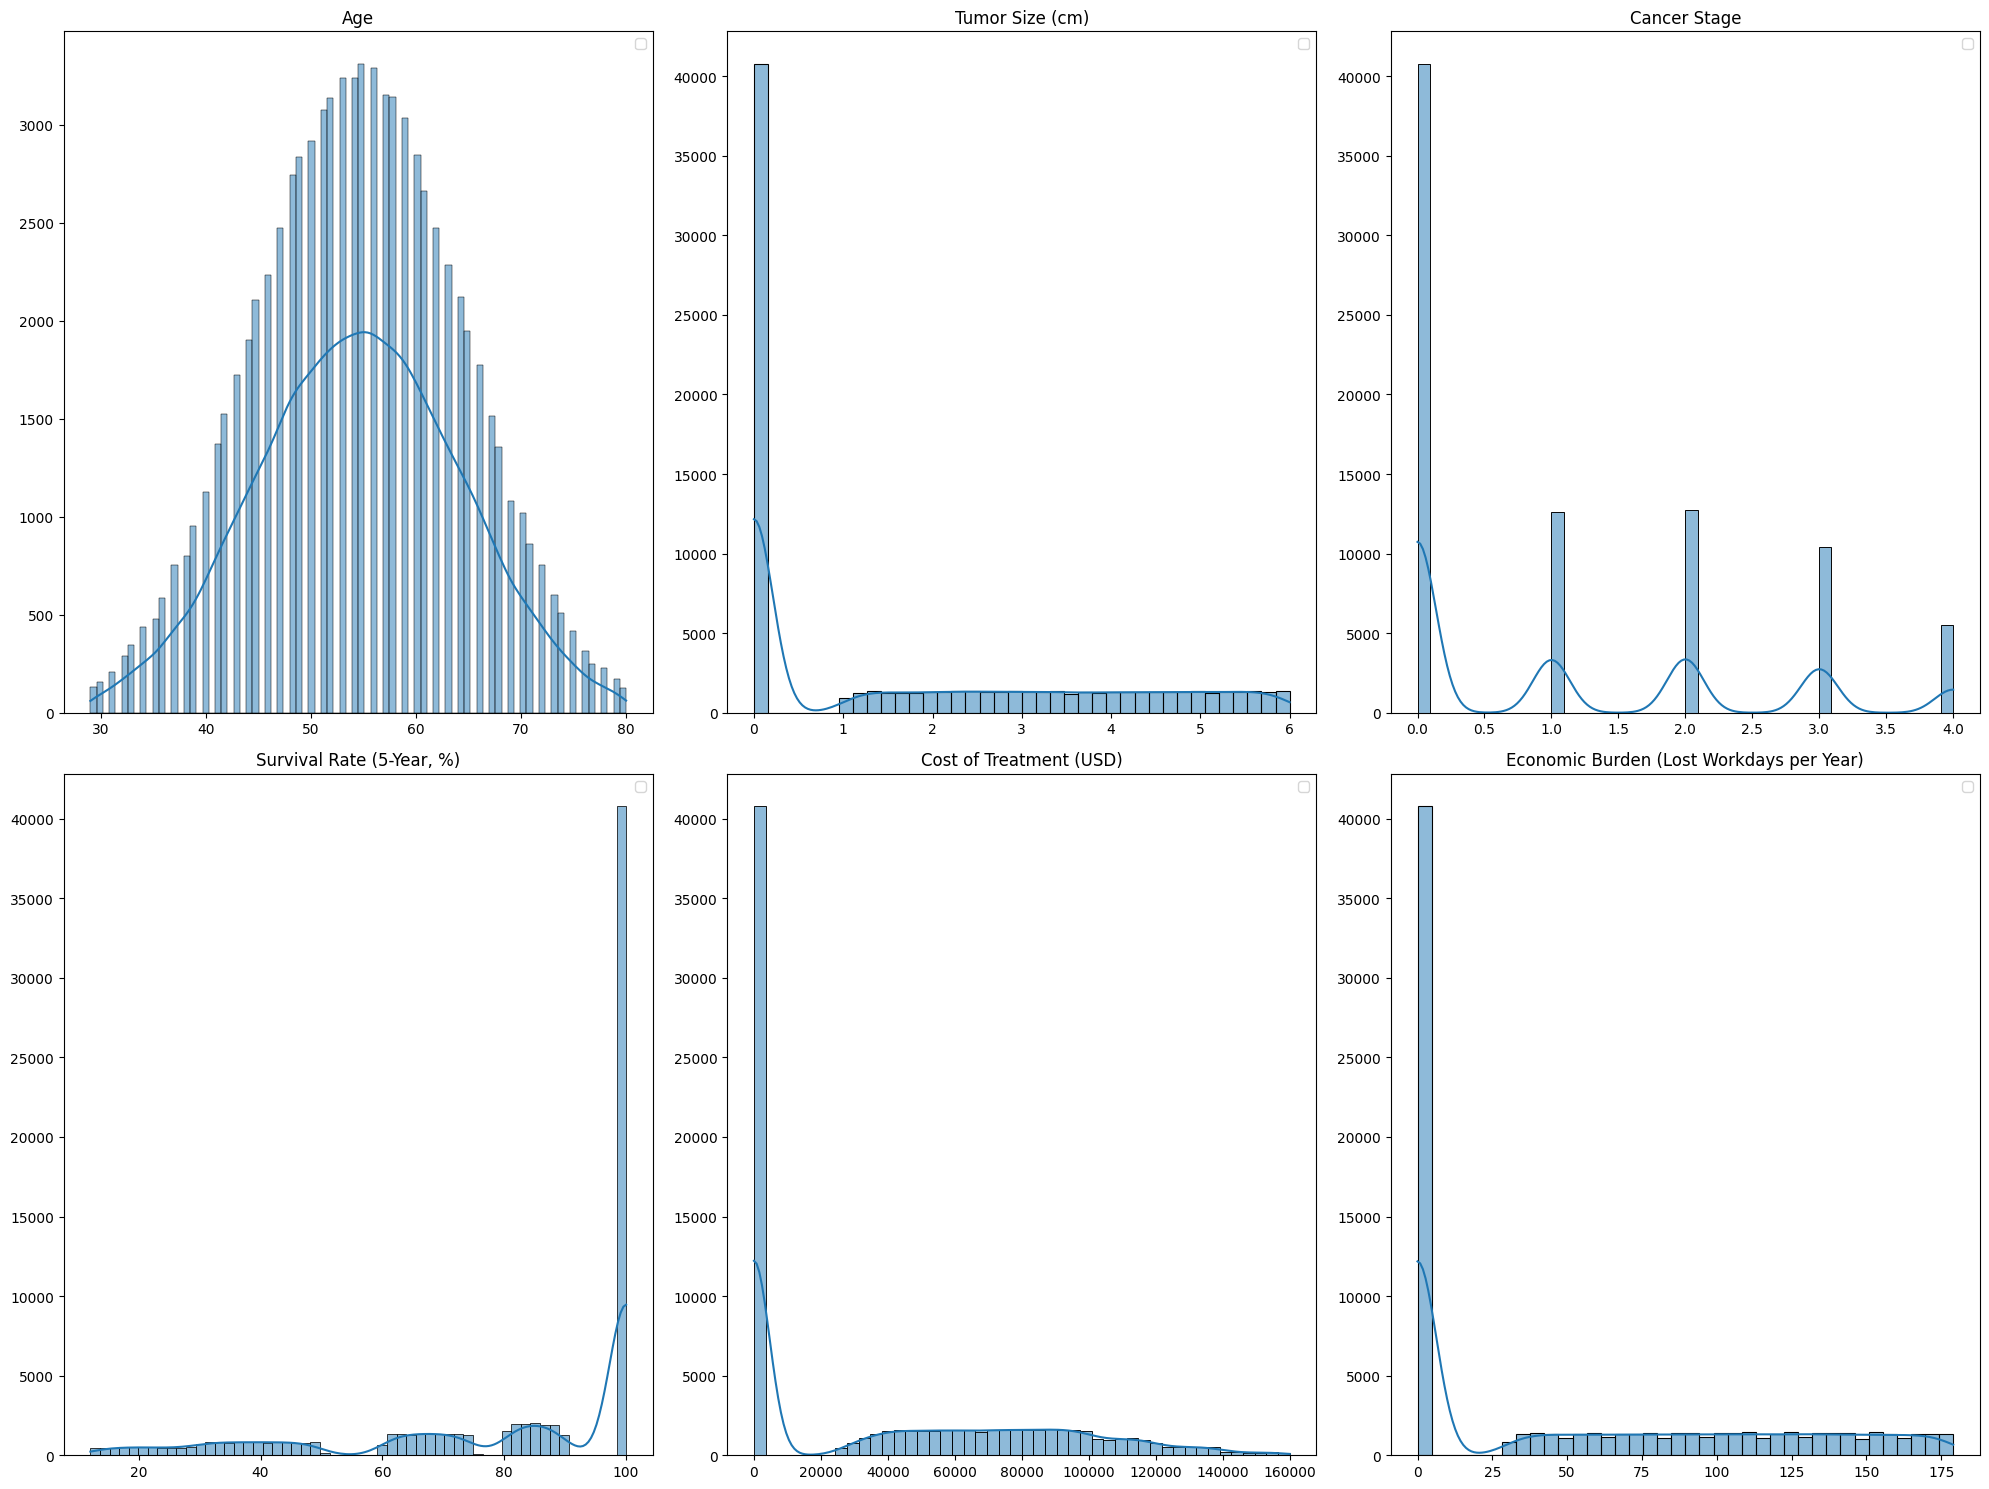

In [33]:
# plottig Distribution of Numeric Features
num_col = df.select_dtypes(include='number').columns
plot_features_subplots(df,features=num_col,hue_col=None,plot_type='histplot')

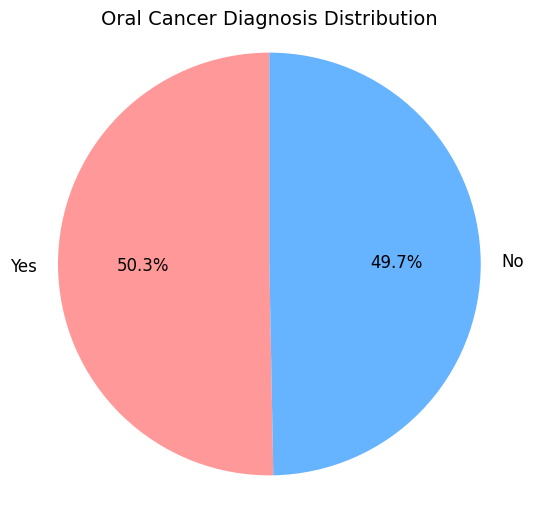

In [34]:
cancer_counts = df['Oral Cancer (Diagnosis)'].value_counts()
labels = cancer_counts.index
sizes = cancer_counts.values

# Pie chart
plt.figure(figsize=(6, 6))
colors = ['#ff9999','#66b3ff']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize': 12})
plt.title('Oral Cancer Diagnosis Distribution', fontsize=14)
plt.axis('equal') 
plt.show()

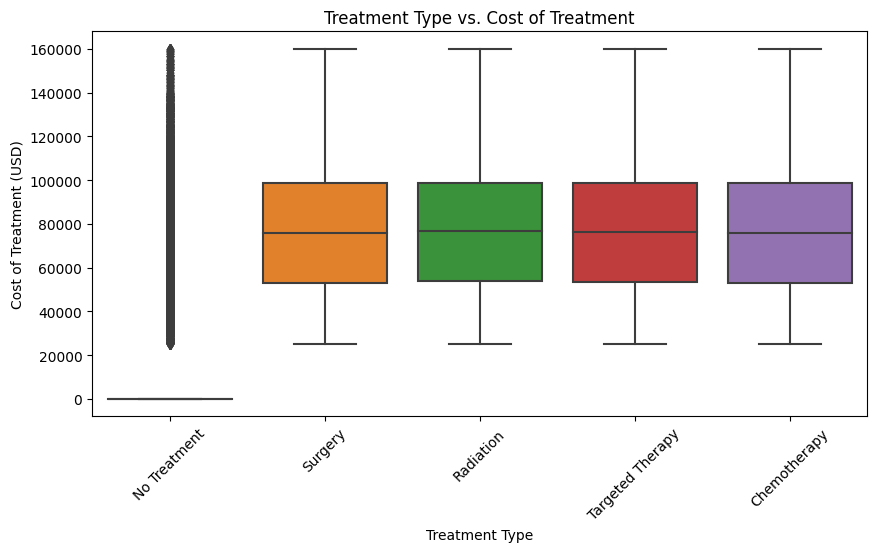

In [35]:
# pltting Traetment Type vs. Cost of Treatment
plt.figure(figsize=(10, 5))
sns.boxplot(data=df,x="Treatment Type", y="Cost of Treatment (USD)")
plt.xticks(rotation=45)
plt.title("Treatment Type vs. Cost of Treatment")
plt.show() 

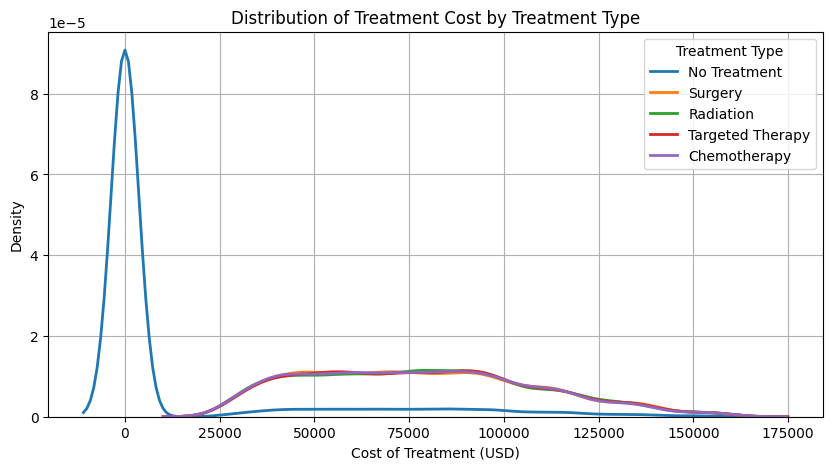

In [36]:
# cost of treatment by treatment type
plt.figure(figsize=(10, 5))
for stage in df["Treatment Type"].unique():
    subset = df[df["Treatment Type"] == stage]
    sns.kdeplot(data=subset, x="Cost of Treatment (USD)", label=stage, linewidth=2)

plt.title("Distribution of Treatment Cost by Treatment Type")
plt.xlabel("Cost of Treatment (USD)")
plt.ylabel("Density")
plt.legend(title="Treatment Type")
plt.grid(True)
plt.show()

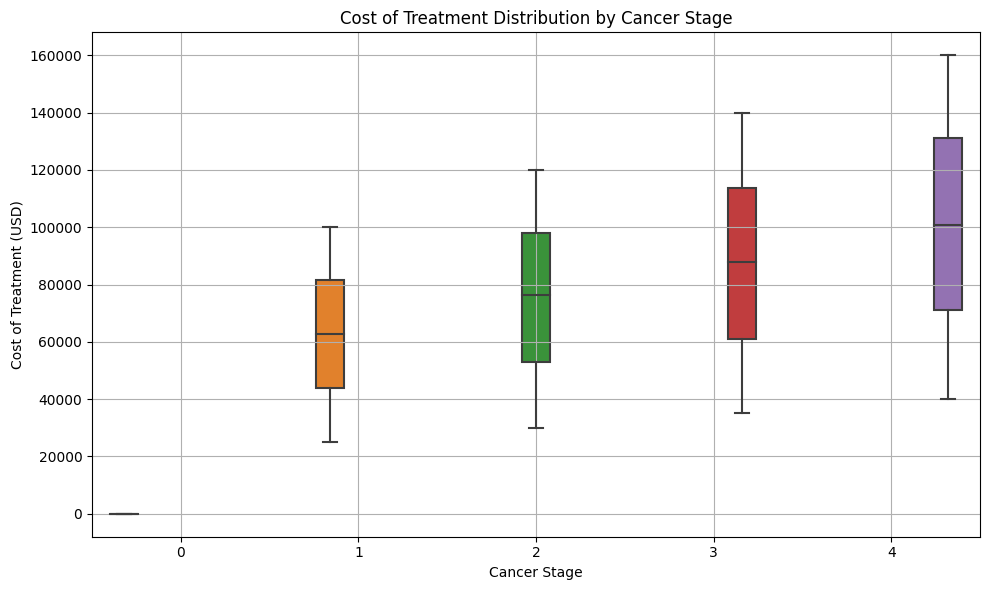

In [37]:
# comparing the distribution of treatment cost for cancer stages
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Cancer Stage", y="Cost of Treatment (USD)",hue='Cancer Stage')

plt.title("Cost of Treatment Distribution by Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Cost of Treatment (USD)")
plt.grid(True)
plt.tight_layout()
plt.legend().set_visible(False)
plt.show()


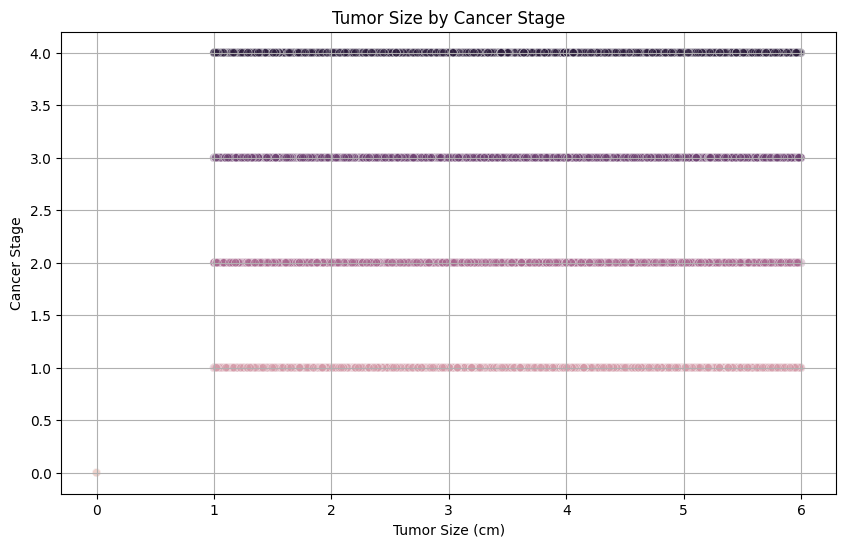

In [38]:
# plotting tumor size by cancer stage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Tumor Size (cm)", y="Cancer Stage",hue='Cancer Stage', alpha=0.5, color="purple")
plt.title("Tumor Size by Cancer Stage")
plt.grid(True)
plt.legend().set_visible(False)
plt.show()


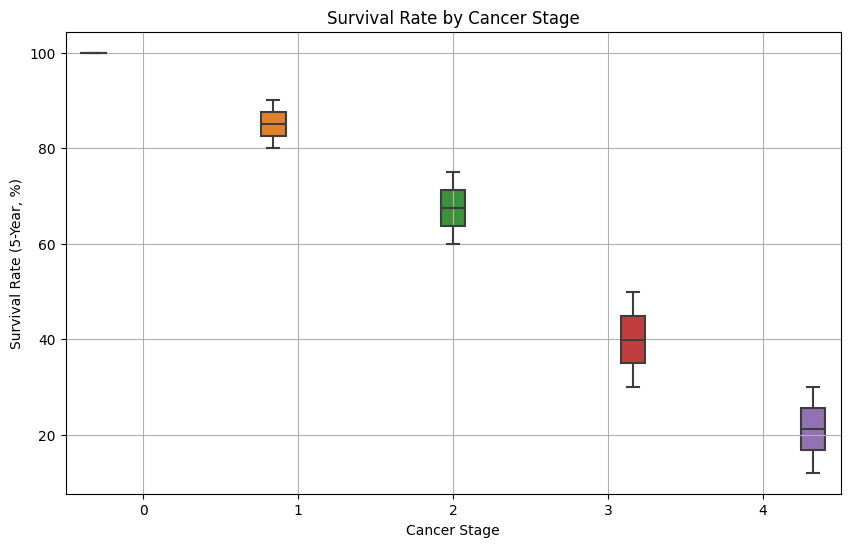

In [39]:
# cancer stage vs survival rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Cancer Stage", y="Survival Rate (5-Year, %)",hue='Cancer Stage')
plt.title("Survival Rate by Cancer Stage")
plt.grid(True)
plt.legend().set_visible(False)
plt.show()


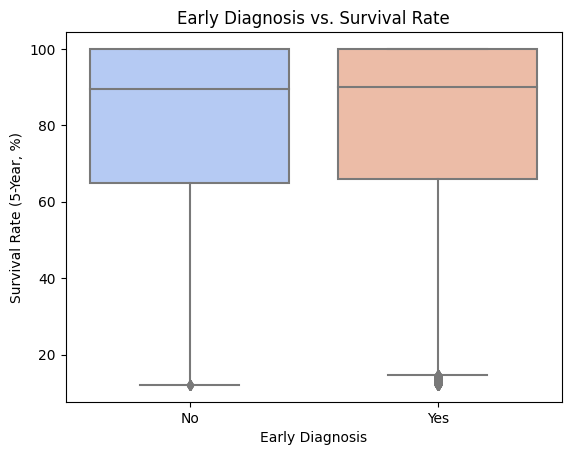

In [40]:
# early diagnosis vs survival rate
sns.boxplot(data=df, x="Early Diagnosis", y="Survival Rate (5-Year, %)", palette="coolwarm")
plt.title("Early Diagnosis vs. Survival Rate")
plt.show()

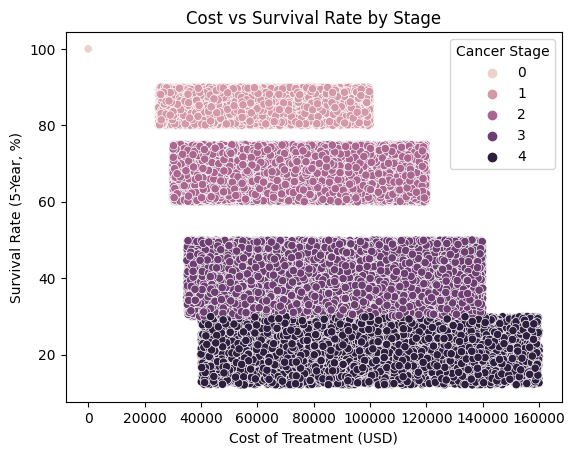

In [41]:
# cost vs survival rate by cancer stage
sns.scatterplot(data=df, x="Cost of Treatment (USD)", y="Survival Rate (5-Year, %)", hue="Cancer Stage")
plt.title("Cost vs Survival Rate by Stage")
plt.show()

### Analysis Cancer by countries

In [42]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Cases']

fig = px.scatter_geo(country_counts,
                    locations="Country",
                    locationmode="country names",
                    color="Cases",
                    color_continuous_scale="Reds",
                    title="Oral Cancer Cases by Country",
                    size='Cases',
                    projection="natural earth")

fig.update_layout(template="plotly_dark")

fig.show()

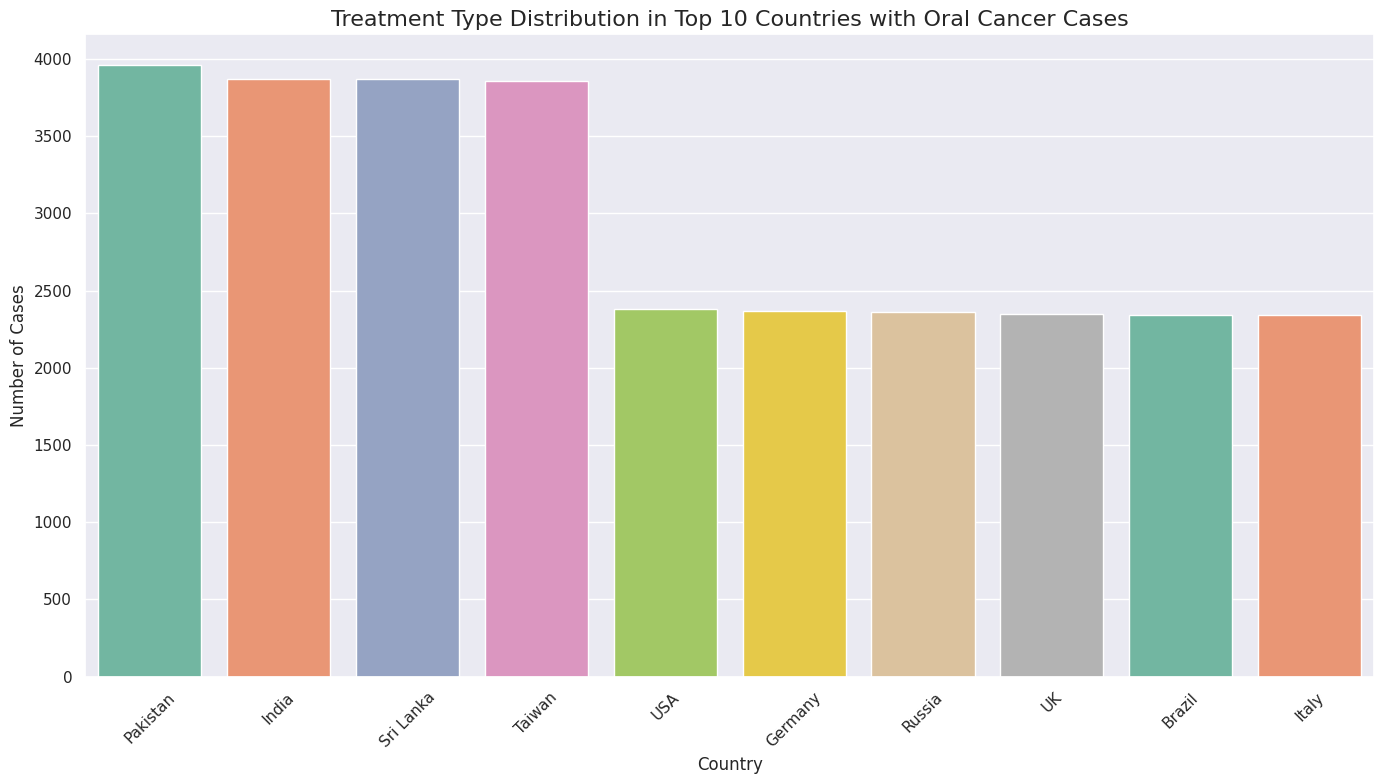

In [43]:
cancer_cases = df[df['Oral Cancer (Diagnosis)'] == 'Yes']

#Get top 10 countries by cancer case count
top_countries = cancer_cases['Country'].value_counts().head(10).index

# Filter data for top 10 countries
top_cancer_df = cancer_cases[cancer_cases['Country'].isin(top_countries)].sort_values(by='Country')


plt.figure(figsize=(14, 8))
sns.set_theme(style="darkgrid")


sns.countplot(data=top_cancer_df, 
              x='Country', 
              order=top_countries,
              palette='Set2')


plt.title('Treatment Type Distribution in Top 10 Countries with Oral Cancer Cases', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [44]:
# Calculate average tumor size per country
avg_tumor_size = df.groupby('Country')['Tumor Size (cm)'].mean().reset_index()
avg_tumor_size.columns = ['Country', 'Average Tumor Size']

# Create scatter geo plot for average tumor size
fig = px.scatter_geo(avg_tumor_size,
                     locations="Country",
                     locationmode="country names",
                     color="Average Tumor Size",
                     color_continuous_scale="Viridis",
                     title="Average Tumor Size by Country",
                     size='Average Tumor Size',
                     projection="natural earth")

fig.update_layout(template="plotly_dark")
fig.show()

In [45]:
treatment_counts = df.groupby(['Country', 'Treatment Type']).size().reset_index(name='Count')

# Sunburst chart
plt.figure(figsize=(10, 6))
fig = px.sunburst(treatment_counts,
                  path=['Country', 'Treatment Type'],
                  values='Count',
                  color='Count',
                  color_continuous_scale='Blues',
                  title='Treatment Type Distribution by Country')

fig.update_layout(template='plotly_dark')
fig.show()

<Figure size 1000x600 with 0 Axes>

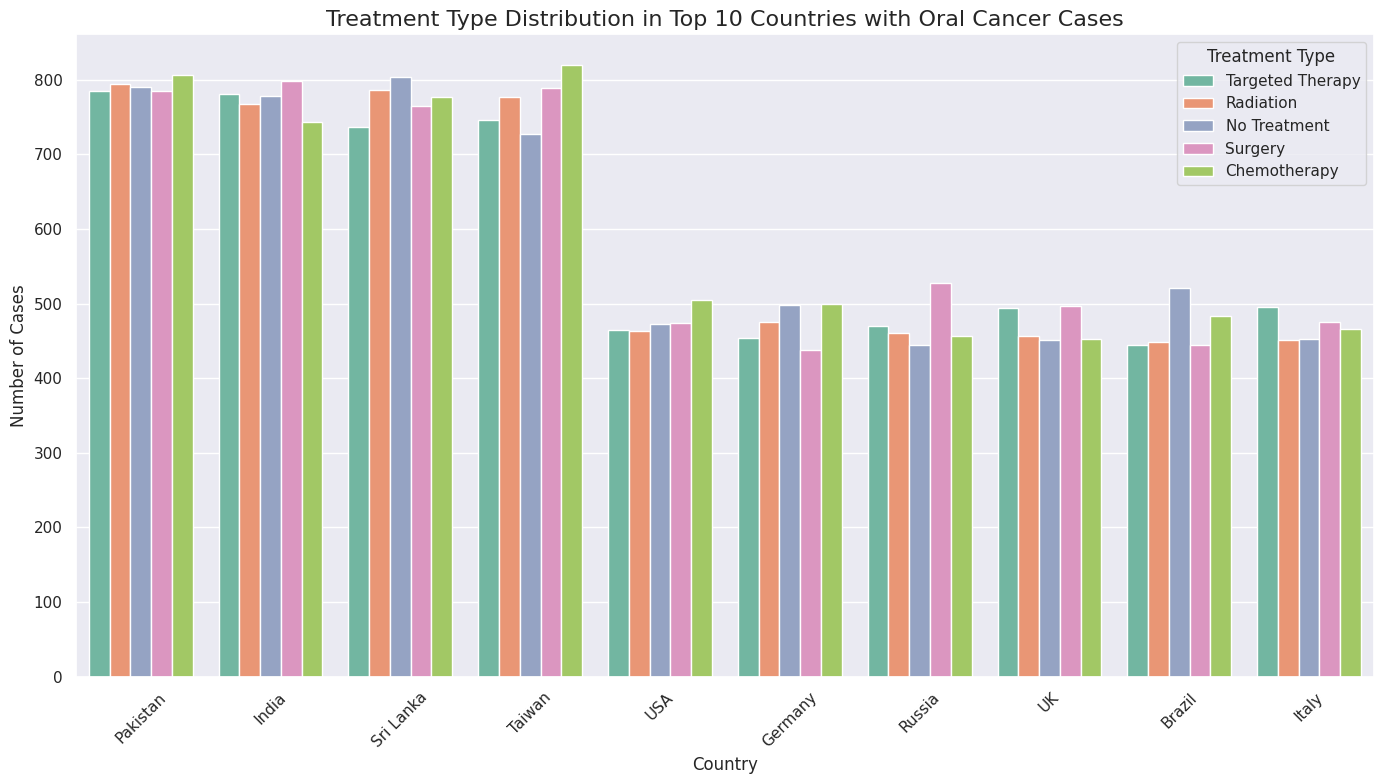

In [46]:
cancer_cases = df[df['Oral Cancer (Diagnosis)'] == 'Yes']

#Get top 10 countries by cancer case count
top_countries = cancer_cases['Country'].value_counts().head(10).index

# Filter data for top 10 countries
top_cancer_df = cancer_cases[cancer_cases['Country'].isin(top_countries)].sort_values(by='Country')


plt.figure(figsize=(14, 8))
sns.set_theme(style="darkgrid")


sns.countplot(data=top_cancer_df, 
              x='Country', 
              hue='Treatment Type',
              order=top_countries,
              palette='Set2')


plt.title('Treatment Type Distribution in Top 10 Countries with Oral Cancer Cases', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Treatment Type')
plt.tight_layout()

plt.show()

In [47]:
avg_cost = df.groupby('Country')['Cost of Treatment (USD)'].mean().reset_index()

# Sort descending by cost
avg_cost = avg_cost.sort_values(by='Cost of Treatment (USD)', ascending=False)

# Plot bar chart
fig = px.bar(avg_cost,
             x='Country',
             y='Cost of Treatment (USD)',
             title='Average Treatment Cost per Country',
             labels={'Cost of Treatment (USD)': 'Average Cost (USD)'},
             color='Cost of Treatment (USD)',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_tickangle=-45, template='plotly_dark')
fig.show()

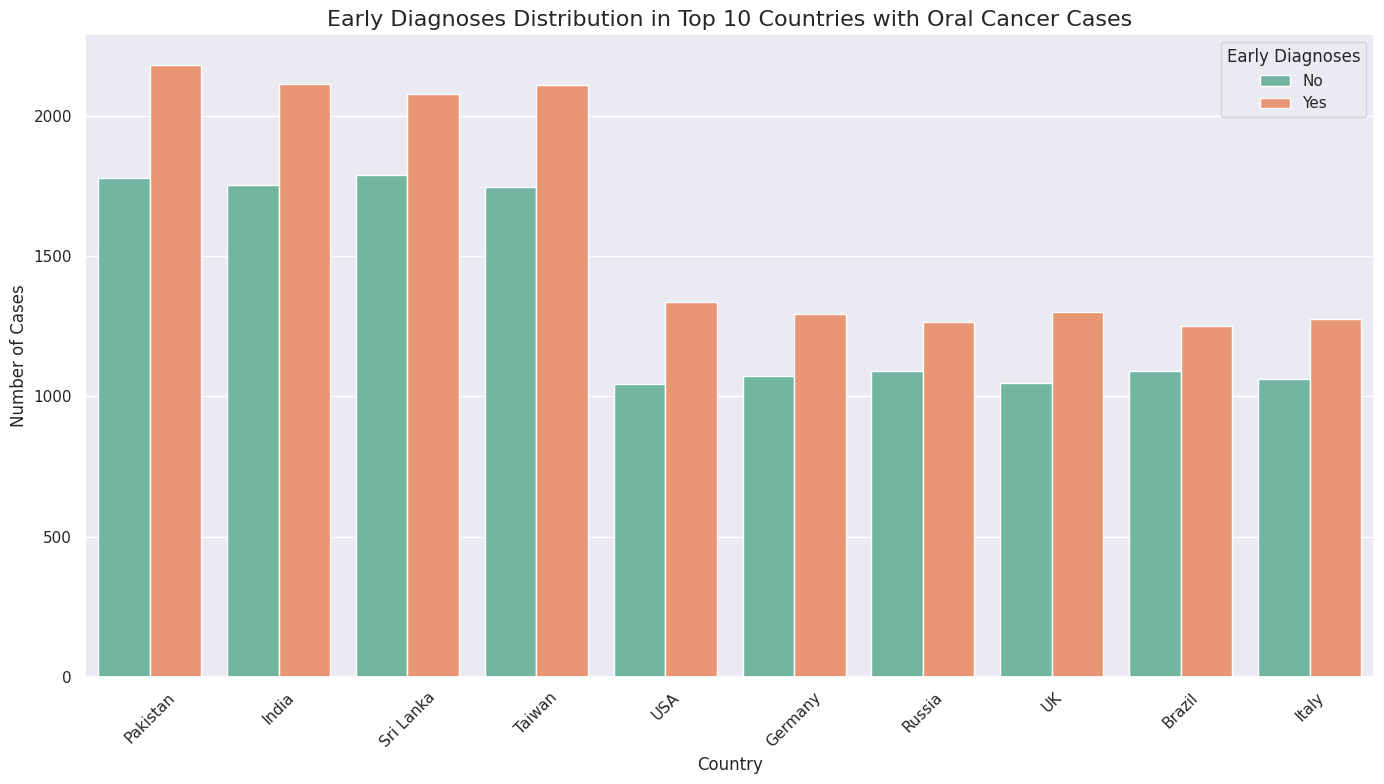

In [48]:
cancer_cases = df[df['Oral Cancer (Diagnosis)'] == 'Yes']

#Get top 10 countries by cancer case count
top_countries = cancer_cases['Country'].value_counts().head(10).index

# Filter data for top 10 countries
top_cancer_df = cancer_cases[cancer_cases['Country'].isin(top_countries)].sort_values(by='Country')


plt.figure(figsize=(14, 8))
sns.set_theme(style="darkgrid")


sns.countplot(data=top_cancer_df, 
              x='Country', 
              hue='Early Diagnosis',
              order=top_countries,
              palette='Set2')


plt.title('Early Diagnoses Distribution in Top 10 Countries with Oral Cancer Cases', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Early Diagnoses')
plt.tight_layout()

plt.show()

## Save cleaned Data

In [49]:
df.to_csv('oral_cancer_cleaned.csv', index=False) 

# Milestone 02

## Feature Engineering

### Calculate Risk score

In [50]:
df['Risk_Score'] = (
    df['Tobacco Use'].map({'Yes': 1, 'No': 0}) +
    df['HPV Infection'].map({'Yes': 1, 'No': 0}) +
    df['Alcohol Consumption'].map({'Yes': 1, 'No': 0}) +
    df['Betel Quid Use'].map({'Yes': 1, 'No': 0}) +
    df['Chronic Sun Exposure'].map({'Yes': 1, 'No': 0})+
      df['Compromised Immune System'].map({'Yes': 1, 'No': 0})
)


### Make Groups of Ages

In [51]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Mid-age', 'Senior', 'Elderly'])

### Calculate Symptoms

In [52]:
symptoms = ['Oral Lesions', 'Unexplained Bleeding', 'Difficulty Swallowing', 'White or Red Patches in Mouth']
df['Symptom_Count'] = df[symptoms].apply(lambda row: sum(row == 'Yes'), axis=1)

In [53]:
# convert Data types
df['Risk_Score']= df['Risk_Score'].astype('int')
df['Symptom_Count'] = df['Symptom_Count'].astype('int')
df['Age_Group'] = df['Age_Group'].astype('object')

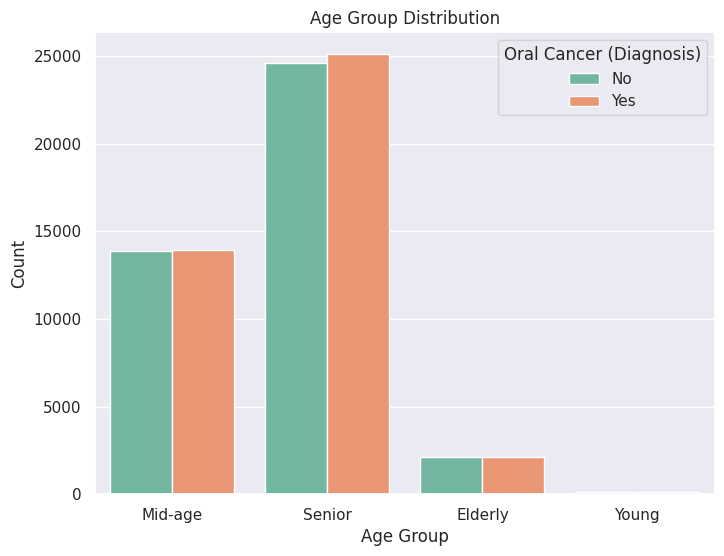

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Age_Group',hue='Oral Cancer (Diagnosis)', palette='Set2')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [55]:
risk_diagnosis_counts = df.groupby(['Risk_Score', 'Oral Cancer (Diagnosis)']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
fig = px.bar(
    risk_diagnosis_counts,
    x='Risk_Score',
    y='Count',
    color='Oral Cancer (Diagnosis)',
    barmode='group',
    title='Number of Cancer Diagnosis (Yes/No) per Risk Score',
    labels={'Count': 'Number of Individuals', 'Risk Score': 'Risk Score'},
)

fig.update_layout(template='plotly_dark')
fig.show()

<Figure size 1200x600 with 0 Axes>

In [56]:
risk_diagnosis_counts = df.groupby(['Symptom_Count', 'Oral Cancer (Diagnosis)']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
fig = px.bar(
    risk_diagnosis_counts,
    x='Symptom_Count',
    y='Count',
    color='Oral Cancer (Diagnosis)',
    barmode='group',
    title='Number of Cancer Diagnosis (Yes/No) per Symptom Count',
    labels={'Count': 'Number of Individuals', 'Symptom Count': 'Symptom Count'},
)

fig.update_layout(template='plotly_dark')
fig.show()

<Figure size 1200x600 with 0 Axes>

In [57]:
df.columns

Index(['Country', 'Age', 'Gender', 'Tobacco Use', 'Alcohol Consumption',
       'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure',
       'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)',
       'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions',
       'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Cancer Stage',
       'Treatment Type', 'Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Early Diagnosis', 'Oral Cancer (Diagnosis)', 'Risk_Score', 'Age_Group',
       'Symptom_Count'],
      dtype='object')

## Drop unnecessary features

In [58]:
df.drop(columns=['Country','Age','Gender','Diet (Fruits & Vegetables Intake)',
                 'Family History of Cancer','Survival Rate (5-Year, %)',
       'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)',
       'Age_Group','Chronic Sun Exposure','Cancer Stage','Treatment Type','Early Diagnosis'],inplace=True)

In [59]:
df.head()

,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Poor Oral Hygiene,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Oral Cancer (Diagnosis),Risk_Score,Symptom_Count
0,Yes,Yes,Yes,No,Yes,No,No,No,No,No,0.000000,No,3,0
1,Yes,Yes,Yes,No,Yes,No,No,Yes,No,No,1.782186,Yes,4,1
2,No,Yes,No,No,Yes,No,No,No,No,Yes,3.523895,Yes,2,1
3,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,0.000000,No,3,1
4,No,No,No,No,Yes,No,No,No,No,No,2.834789,Yes,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82048 entries, 0 to 84921
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Tobacco Use                    82048 non-null  object 
 1   Alcohol Consumption            82048 non-null  object 
 2   HPV Infection                  82048 non-null  object 
 3   Betel Quid Use                 82048 non-null  object 
 4   Poor Oral Hygiene              82048 non-null  object 
 5   Compromised Immune System      82048 non-null  object 
 6   Oral Lesions                   82048 non-null  object 
 7   Unexplained Bleeding           82048 non-null  object 
 8   Difficulty Swallowing          82048 non-null  object 
 9   White or Red Patches in Mouth  82048 non-null  object 
 10  Tumor Size (cm)                82048 non-null  float64
 11  Oral Cancer (Diagnosis)        82048 non-null  object 
 12  Risk_Score                     82048 non-null  int6

In [61]:
df.dtypes

Tobacco Use                       object
Alcohol Consumption               object
HPV Infection                     object
Betel Quid Use                    object
Poor Oral Hygiene                 object
Compromised Immune System         object
Oral Lesions                      object
Unexplained Bleeding              object
Difficulty Swallowing             object
White or Red Patches in Mouth     object
Tumor Size (cm)                  float64
Oral Cancer (Diagnosis)           object
Risk_Score                         int64
Symptom_Count                      int64
dtype: object

In [62]:
#make sure the target variable is the last column and the rest of the columns are features
df = df[[col for col in df.columns if col != 'Oral Cancer (Diagnosis)'] + ['Oral Cancer (Diagnosis)']]
df.head()

,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Poor Oral Hygiene,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Risk_Score,Symptom_Count,Oral Cancer (Diagnosis)
0,Yes,Yes,Yes,No,Yes,No,No,No,No,No,0.000000,3,0,No
1,Yes,Yes,Yes,No,Yes,No,No,Yes,No,No,1.782186,4,1,Yes
2,No,Yes,No,No,Yes,No,No,No,No,Yes,3.523895,2,1,Yes
3,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,0.000000,3,1,No
4,No,No,No,No,Yes,No,No,No,No,No,2.834789,0,0,Yes


## Feature Selection

### Encodeing

In [63]:
encoders = {}

for col in df.drop(columns=['Symptom_Count','Risk_Score']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [64]:
encoders

{'Tobacco Use': LabelEncoder(),
 'Alcohol Consumption': LabelEncoder(),
 'HPV Infection': LabelEncoder(),
 'Betel Quid Use': LabelEncoder(),
 'Poor Oral Hygiene': LabelEncoder(),
 'Compromised Immune System': LabelEncoder(),
 'Oral Lesions': LabelEncoder(),
 'Unexplained Bleeding': LabelEncoder(),
 'Difficulty Swallowing': LabelEncoder(),
 'White or Red Patches in Mouth': LabelEncoder(),
 'Tumor Size (cm)': LabelEncoder(),
 'Oral Cancer (Diagnosis)': LabelEncoder()}

### correlation Matrix


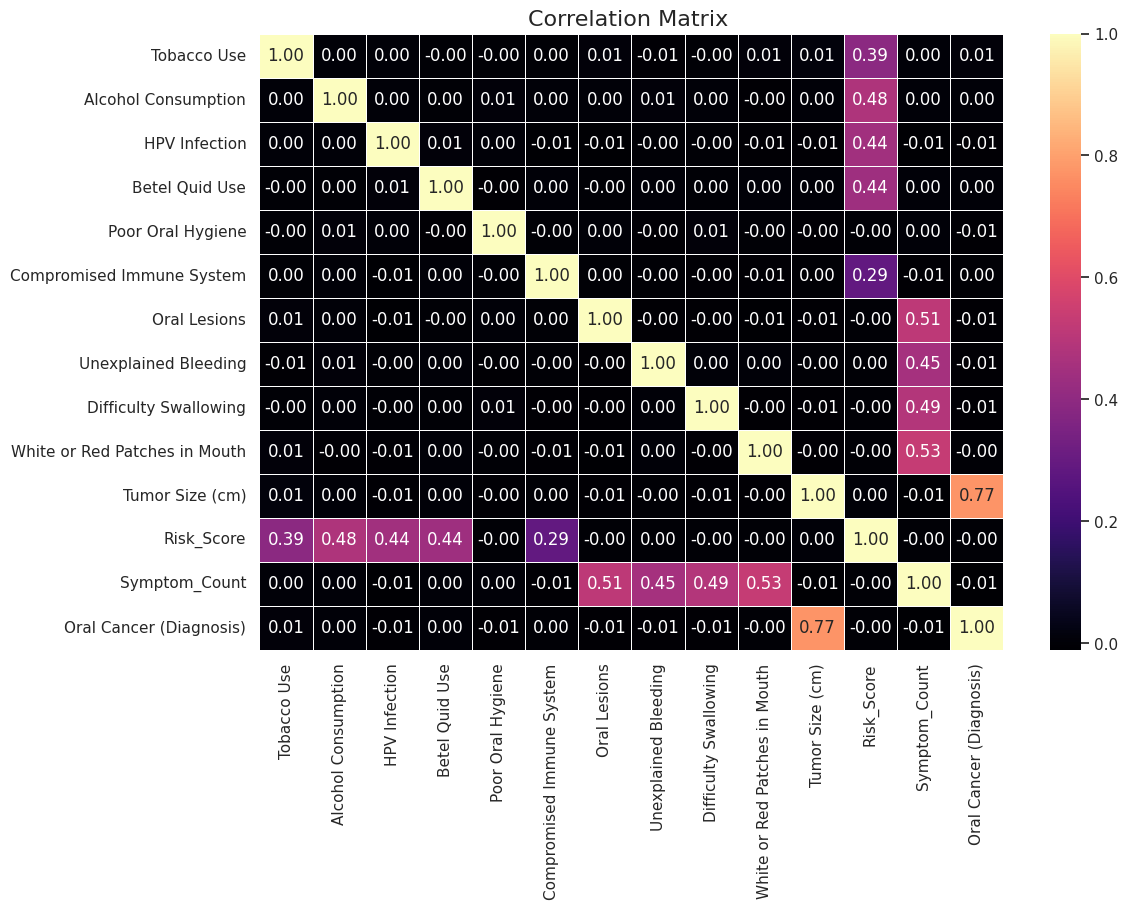

In [65]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="magma", linewidths=0.5)
plt.title("Correlation Matrix ", fontsize=16)
plt.show()

### 🔍 Oral Cancer Correlation Matrix Insights

- **Top Risk Factors for Oral Cancer:**
   Alcohol Consumption (0.48) and HPV Infection (0.44) have the strongest correlations with Risk_Score, even slightly stronger than Tobacco Use (0.39)—contrary to common assumptions.

   Betel Quid Use (0.44) is equally significant as HPV, highlighting its underrated role in oral cancer risk.

- **Diagnosis Drivers:**
   Tumor Size (0.77) is the single strongest predictor of Oral Cancer Diagnosis, far outweighing other factors.

   Surprisingly, Symptom_Count (-0.01) shows almost no correlation with diagnosis, meaning the number of symptoms matters less than specific symptoms.

- **Symptom-Specific Insights:**
   White/Red Patches (0.53) and Oral Lesions (0.51) correlate most strongly with Symptom_Count, making them key clinical warning signs.

   Difficulty Swallowing (0.49) and Unexplained Bleeding (0.45) also contribute significantly.

- **Unexpected Weak Links:**
   Poor Oral Hygiene has near-zero correlation with everything (ranging from -0.00 to 0.01), suggesting it may be overestimated as a standalone risk factor.

   Gender, Age, or Immune Status (if included) don’t appear strongly linked—fraud detection-style demographics aren’t major players here.

**Key Takeaway:**
Oral cancer risk is driven by lifestyle factors (alcohol, HPV, betel quid) and tumor progression, while diagnosis relies heavily on tumor size and specific symptoms—not just symptom quantity.

In [66]:
df.drop(columns=['Poor Oral Hygiene'], inplace=True)  

### Fisher score

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif

In [68]:
X = df.drop(columns=['Oral Cancer (Diagnosis)'])  # Features
y = df['Oral Cancer (Diagnosis)']  # Target variable

In [69]:
# Assume X contains features and y contains labels 
# Use SelectKBest with Fisher Score (f_classif)
num_features = 10  # Select top 10 features
selector = SelectKBest(score_func=f_classif, k=num_features)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Top Features Selected by Fisher Score:", selected_features)

Top Features Selected by Fisher Score: Index(['Tobacco Use', 'Alcohol Consumption', 'HPV Infection', 'Betel Quid Use',
       'Oral Lesions', 'Unexplained Bleeding', 'Difficulty Swallowing',
       'White or Red Patches in Mouth', 'Tumor Size (cm)', 'Symptom_Count'],
      dtype='object')


### Feature Selection using Fisher Score (ANOVA F-value)

In [70]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

#Fisher Score (f_classif)
selector = SelectKBest(score_func=f_classif, k='all') 
X_selected = selector.fit_transform(X, y)

fisher_scores = selector.scores_

# data frame with feature names and their corresponding Fisher scores
fisher_df = pd.DataFrame({
    'Feature': X.columns,
    'Fisher Score': fisher_scores
})

#Fisher Score
fisher_df = fisher_df.sort_values(by='Fisher Score', ascending=False)

# Display the table of features ranked by their Fisher Scores
print(fisher_df)


                          Feature   Fisher Score
9                 Tumor Size (cm)  122339.946676
11                  Symptom_Count       7.187541
0                     Tobacco Use       5.349439
2                   HPV Infection       3.298047
7           Difficulty Swallowing       3.233599
5                    Oral Lesions       2.529583
6            Unexplained Bleeding       2.292694
8   White or Red Patches in Mouth       0.275588
3                  Betel Quid Use       0.154916
1             Alcohol Consumption       0.087682
10                     Risk_Score       0.066684
4       Compromised Immune System       0.052323


### feature importance using Random Forest

In [71]:
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
features = X.columns

# Sort features by importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df

,Feature,Importance
9,Tumor Size (cm),0.998014
10,Risk_Score,0.000520
11,Symptom_Count,0.000283
3,Betel Quid Use,0.000152
2,HPV Infection,0.000152
1,Alcohol Consumption,0.000146
4,Compromised Immune System,0.000141
0,Tobacco Use,0.000134
7,Difficulty Swallowing,0.000130
8,White or Red Patches in Mouth,0.000120


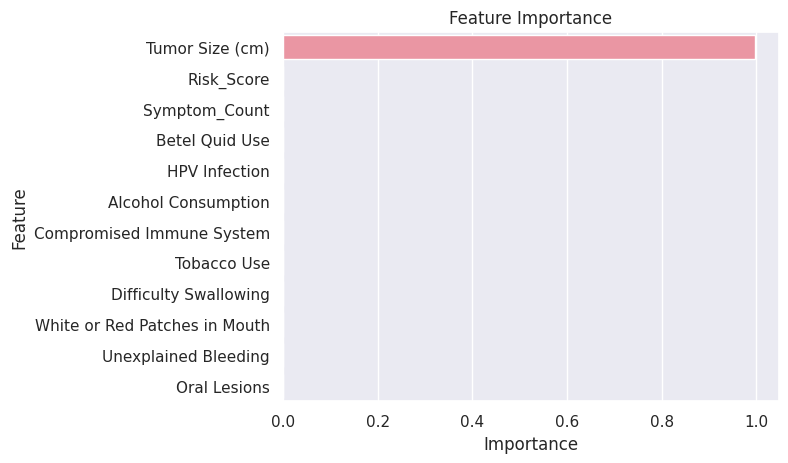

In [72]:
# Plot feature importance
sns.barplot(x=feature_importance_df.Importance, y=feature_importance_df.Feature)
plt.title("Feature Importance")
plt.show()

### **Feature Importance Insights**
Analysis using both Random Forest and Fisher Score methods revealed that:

- Tumor Size (cm) is by far the most critical predictor of oral cancer. It shows an overwhelmingly high importance in both models, indicating that larger tumor sizes are strongly associated with cancer diagnosis.

- Symptom Count ranks second, especially based on Fisher Score. This suggests that individuals exhibiting multiple symptoms are significantly more likely to be diagnosed with oral cancer.

- Tobacco Use and HPV Infection are among the top behavioral and biological risk factors contributing to oral cancer risk, reinforcing existing medical research linking these factors to oral malignancies.

- Difficulty Swallowing, Oral Lesions, and Unexplained Bleeding are also influential symptoms. Their relatively high Fisher Scores highlight their diagnostic relevance even if their Random Forest importance is slightly lower.

- Other factors like Betel Quid Use, Alcohol Consumption, and Compromised Immune System show lower importance in this dataset, suggesting either weak correlation or insufficient representation.

**Focusing on tumor size, symptom count, and key risk factors like tobacco use and HPV infection can greatly enhance the predictive performance of diagnostic models. These insights also support clinical strategies aimed at early symptom screening and behavioral risk assessment.**

In [73]:
top_features = [
    'Tumor Size (cm)',
    'Symptom_Count',
    'Tobacco Use',
    'HPV Infection',
    'Difficulty Swallowing',
    'Oral Lesions',
    'Unexplained Bleeding'
]
df_filtered = df[top_features + ['Oral Cancer (Diagnosis)']]

In [74]:
df_filtered

,Tumor Size (cm),Symptom_Count,Tobacco Use,HPV Infection,Difficulty Swallowing,Oral Lesions,Unexplained Bleeding,Oral Cancer (Diagnosis)
0,0,0,1,1,0,0,0,0
1,6417,1,1,1,0,0,1,1
2,20890,1,0,0,0,0,0,1
3,0,1,1,0,0,1,0,0
4,15149,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
84917,0,1,1,0,0,0,0,0
84918,0,2,1,0,1,0,0,0
84919,31055,0,1,0,0,0,0,1
84920,0,2,1,0,1,1,0,0


In [75]:
df_filtered.shape

(82048, 8)

In [76]:
df_filtered['Oral Cancer (Diagnosis)'].value_counts()

Oral Cancer (Diagnosis)
1    41269
0    40779
Name: count, dtype: int64

In [77]:
df_filtered.dtypes

Tumor Size (cm)            int64
Symptom_Count              int64
Tobacco Use                int64
HPV Infection              int64
Difficulty Swallowing      int64
Oral Lesions               int64
Unexplained Bleeding       int64
Oral Cancer (Diagnosis)    int64
dtype: object

## Save Selected Data

In [78]:
df.to_csv('oral_cancer_Selected.csv', index=False)

# Milestone 03

## Model Selection

In [79]:
import joblib

In [80]:
X = df_filtered.drop('Oral Cancer (Diagnosis)', axis=1)  
y =df_filtered['Oral Cancer (Diagnosis)'] 

In [81]:
# split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Scaling phase

In [82]:
# Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [83]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42 ),
    'Decision Tree': DecisionTreeClassifier(random_state=42 ),
    'Random Forest': RandomForestClassifier(random_state=42 ),
    'XGBoost': xgb.XGBClassifier(random_state=42 ),
    'LightGBM': lgb.LGBMClassifier(is_unbalance=False,random_state=42 )
}
results = {}

In [84]:
ModelName=[]
ModelAccuracy=[]
for name, model in tqdm(models.items()):
    model.fit(X_train_scaled, y_train)
    ModelName.append(name)
    y_pred = model.predict(X_test_scaled)
    ModelAccuracy.append([
         accuracy_score(y_test, y_pred),
         precision_score(y_test, y_pred),
         recall_score(y_test, y_pred),
         f1_score(y_test,y_pred)
         ])
    if name == 'Logistic Regression':
        joblib.dump(model, 'lr.pkl')
        print("✅ lr model saved as lr.pkl")
    if name == 'XGBoost':
        joblib.dump(model, 'xgb.pkl')
        print("✅ xgb model saved as lr.pkl")
ModelAccuracy=pd.DataFrame(ModelAccuracy,index=ModelName,columns=['Accuracy','Precision','Recall','F1 Score'])
ModelAccuracy

 20%|██        | 1/5 [00:00<00:00,  7.42it/s]

✅ lr model saved as lr.pkl


 80%|████████  | 4/5 [00:01<00:00,  2.16it/s]

✅ xgb model saved as lr.pkl
[LightGBM] [Info] Number of positive: 33015, number of negative: 32623
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 276
[LightGBM] [Info] Number of data points in the train set: 65638, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502986 -> initscore=0.011944
[LightGBM] [Info] Start training from score 0.011944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

100%|██████████| 5/5 [00:02<00:00,  2.42it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.986959,1.0,0.974073,0.986866
Decision Tree,1.000000,1.0,1.000000,1.000000
Random Forest,1.000000,1.0,1.000000,1.000000
XGBoost,0.997928,1.0,0.995881,0.997936
LightGBM,1.000000,1.0,1.000000,1.000000


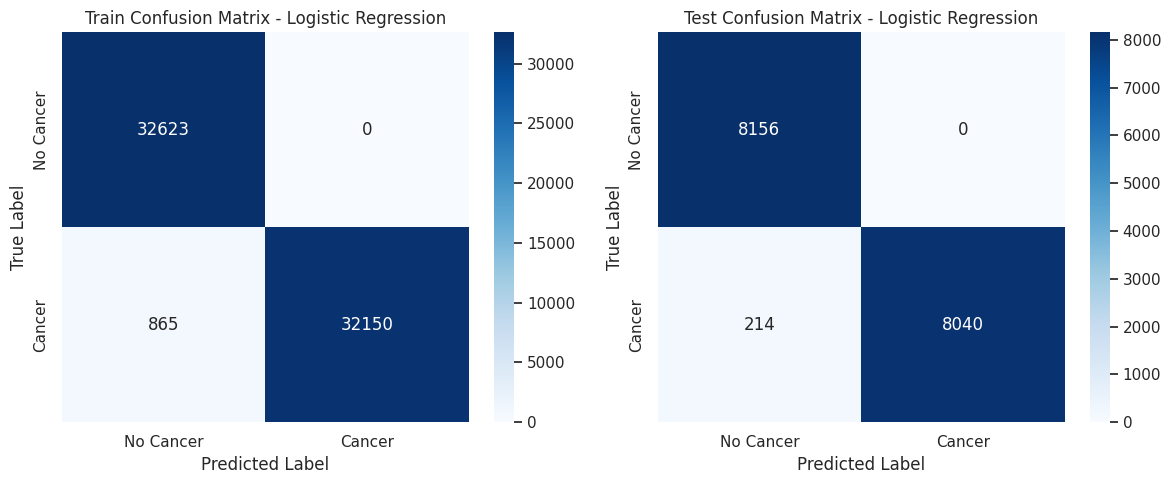

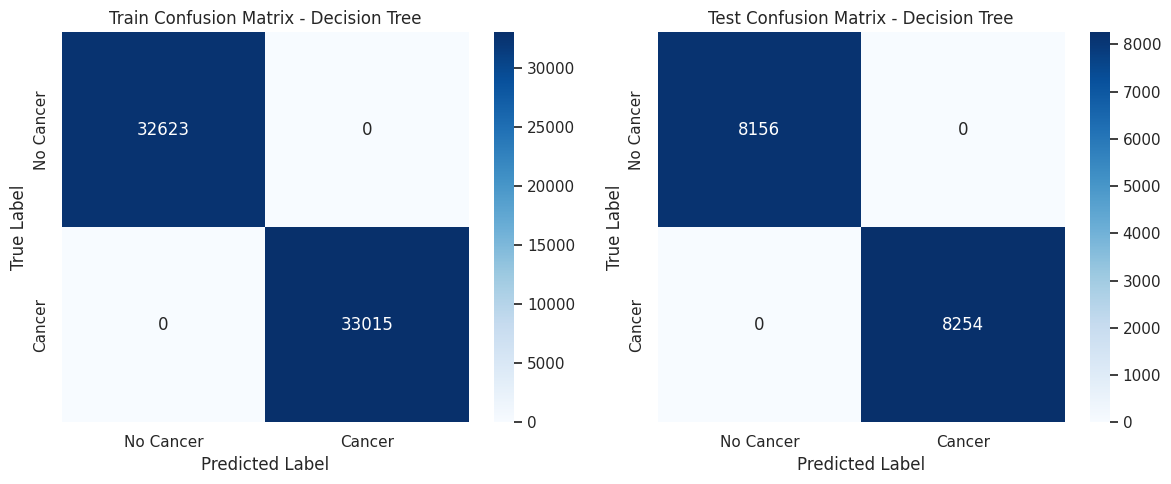

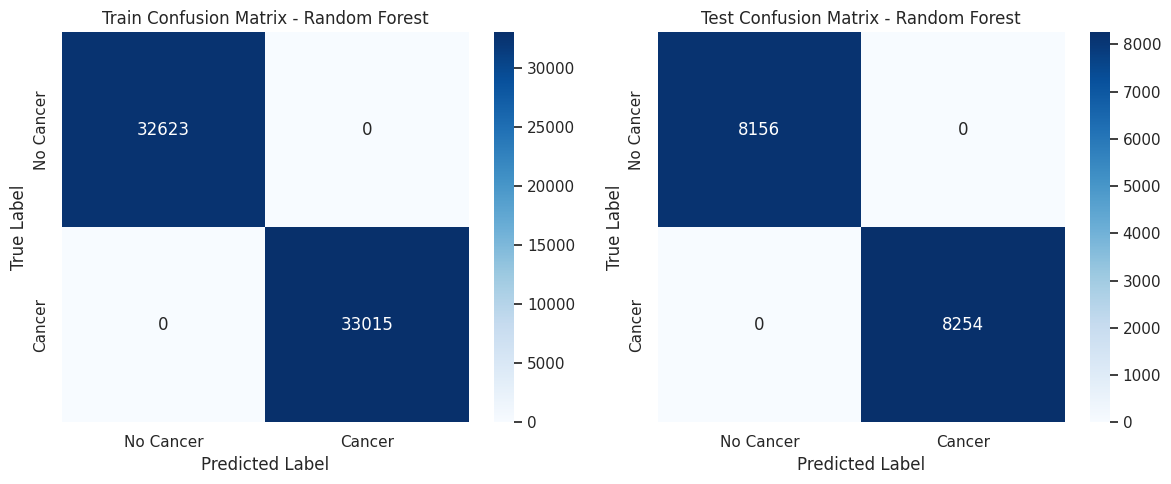

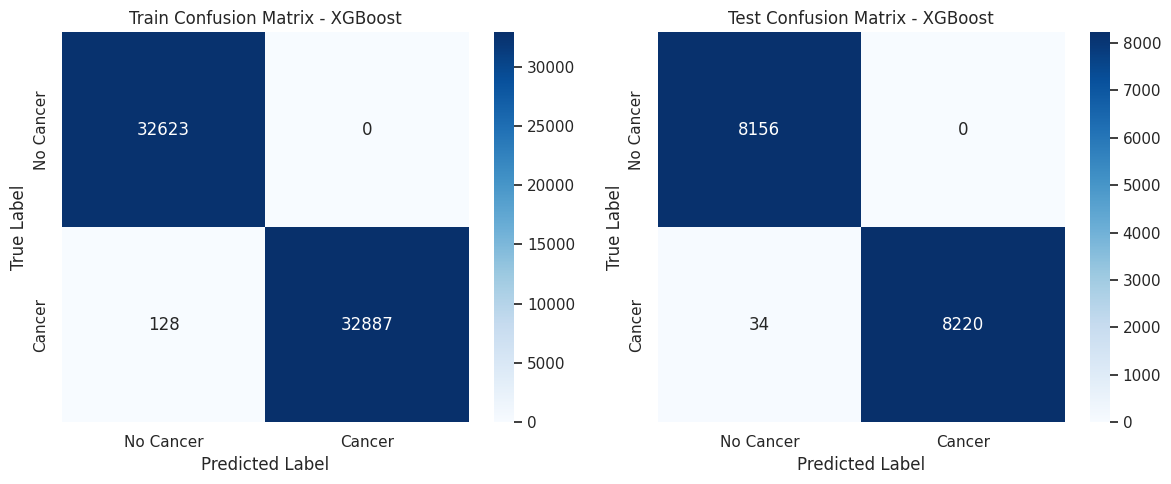

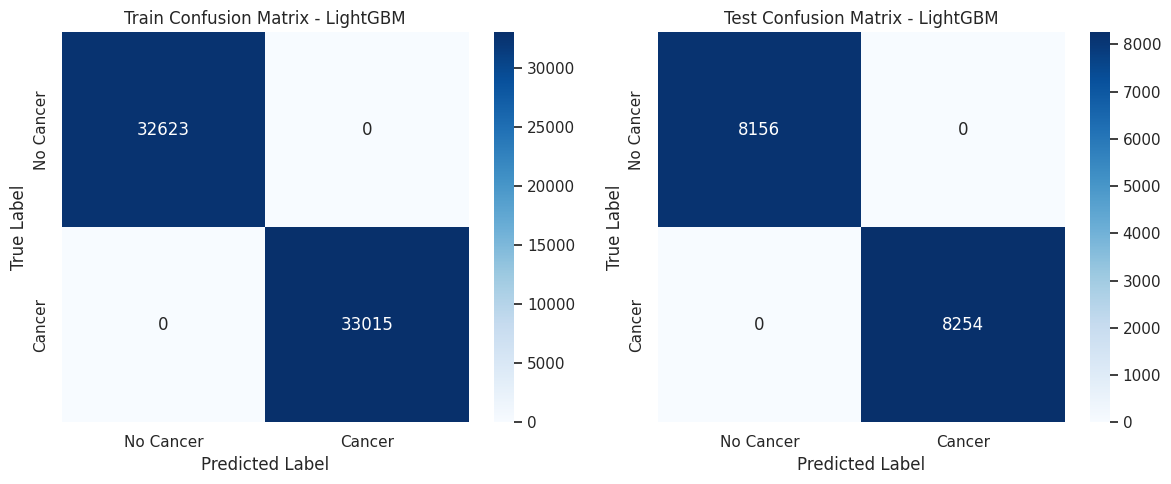

In [85]:
for name, model in models.items():
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Confusion matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Plot Train Confusion Matrix
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Cancer", "Cancer"],
                yticklabels=["No Cancer", "Cancer"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Train Confusion Matrix - {name}")

    # Plot Test Confusion Matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Cancer", "Cancer"],
                yticklabels=["No Cancer", "Cancer"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Test Confusion Matrix - {name}")

    plt.tight_layout()
    plt.show()

In [86]:
results_df = ModelAccuracy.reset_index().rename(columns={'index': 'Model'})

# Melt the dataframe for multi-metric comparison
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
fig = px.bar(
    results_melted,
    x='Model',
    y='Score',
    color='Metric',
    barmode='group',
    title='Model Performance Comparison (Accuracy, Precision, Recall, F1 Score)',
    text_auto='.2f'
)
fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()

In [87]:
additional_models = {
    'SVM (RBF Kernel)': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'SGD Classifier': SGDClassifier(max_iter=1000, tol=1e-3),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis()
}


In [88]:
ModelName=[]
ModelAccuracy=[]
for name, model in tqdm(additional_models.items()):
    model.fit(X_train_scaled, y_train)
    ModelName.append(name)
    y_pred = model.predict(X_test_scaled)
    ModelAccuracy.append([
         accuracy_score(y_test, y_pred),
         precision_score(y_test, y_pred),
         recall_score(y_test, y_pred),
         f1_score(y_test,y_pred)
         ])
    if name == 'K-Nearest Neighbors':
        joblib.dump(model, 'knn_model.pkl')
        print("✅ KNN model saved as knn_model.pkl")
ModelAccuracy=pd.DataFrame(ModelAccuracy,index=ModelName,columns=['Accuracy','Precision','Recall','F1 Score'])
ModelAccuracy

100%|██████████| 6/6 [01:25<00:00, 14.21s/it]

✅ KNN model saved as knn_model.pkl


,Accuracy,Precision,Recall,F1 Score
SVM (RBF Kernel),0.985070,1.0,0.970317,0.984935
K-Nearest Neighbors,0.998842,1.0,0.997698,0.998848
Gaussian Naive Bayes,1.000000,1.0,1.000000,1.000000
AdaBoost,1.000000,1.0,1.000000,1.000000
SGD Classifier,0.989580,1.0,0.979283,0.989533
Quadratic Discriminant Analysis,1.000000,1.0,1.000000,1.000000


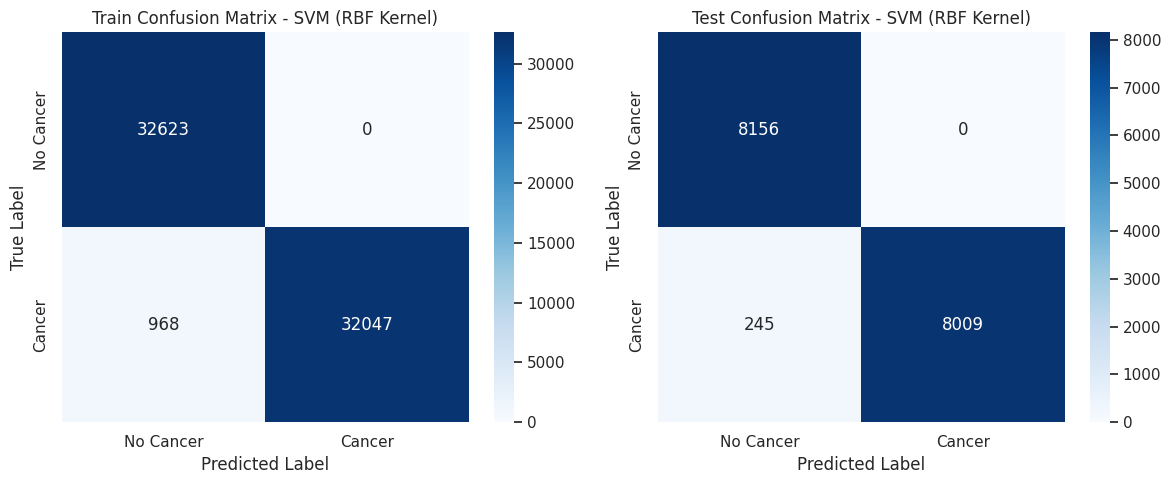

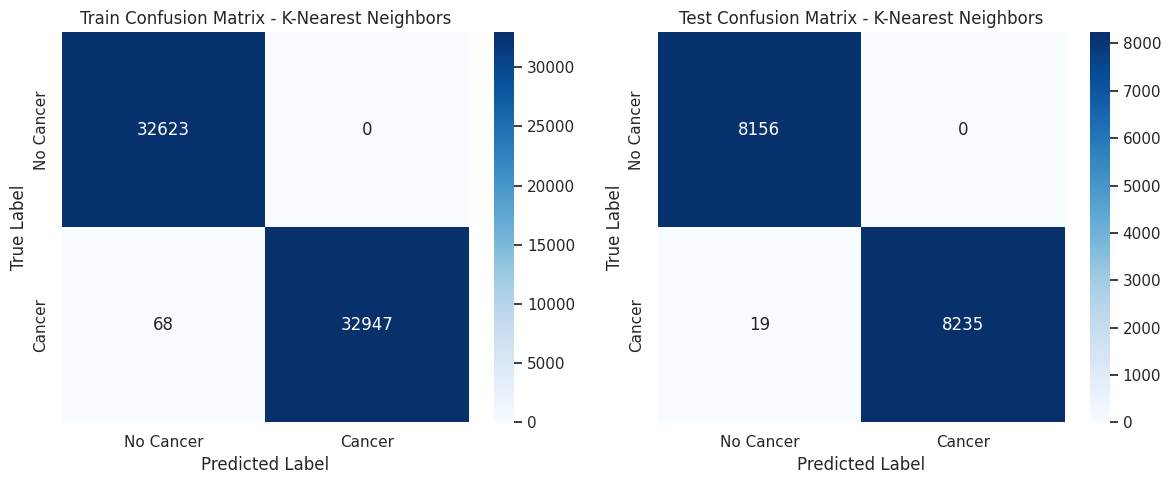

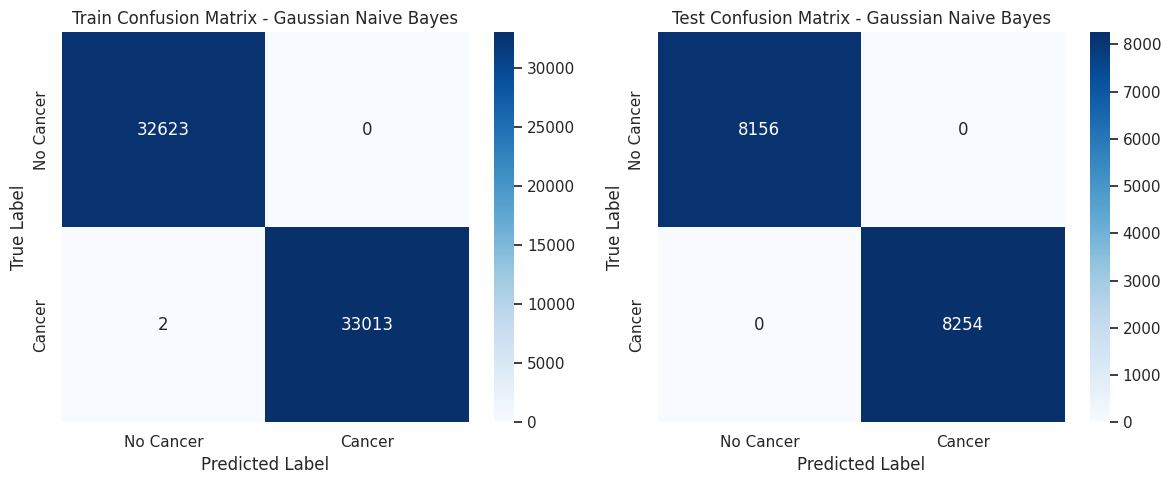

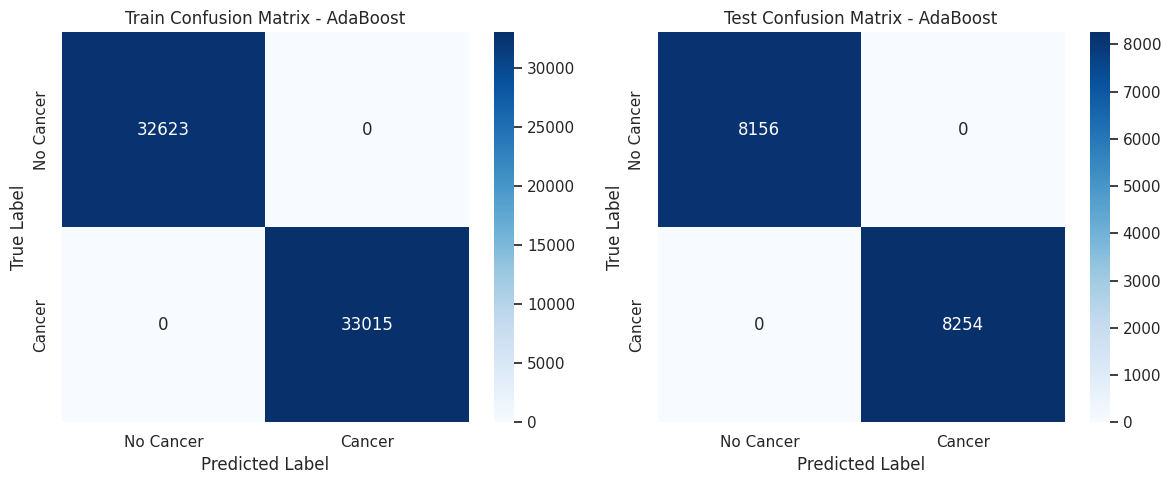

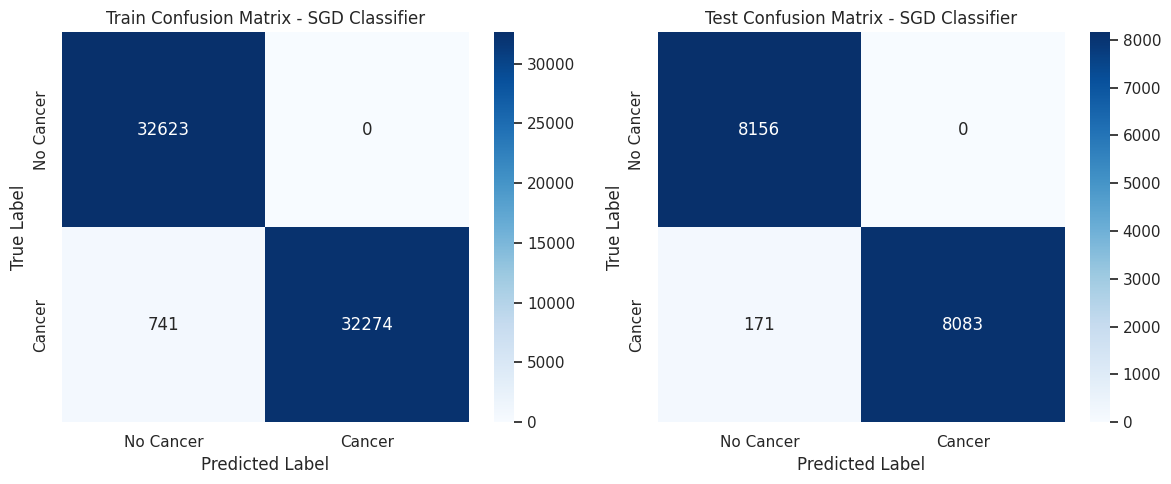

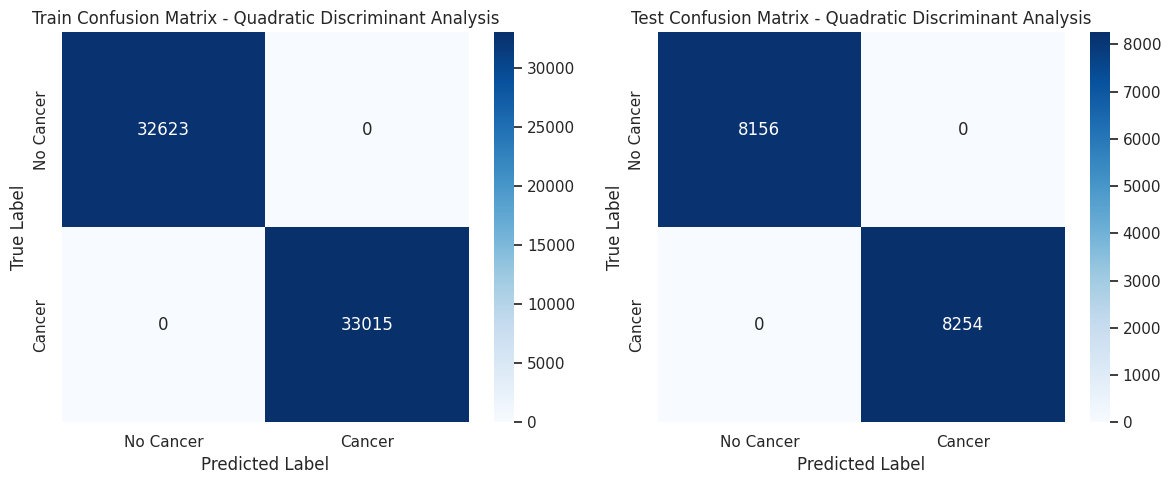

In [89]:
for name, model in additional_models.items():
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Confusion matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Plot Train Confusion Matrix
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Cancer", "Cancer"],
                yticklabels=["No Cancer", "Cancer"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Train Confusion Matrix - {name}")

    # Plot Test Confusion Matrix
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Cancer", "Cancer"],
                yticklabels=["No Cancer", "Cancer"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Test Confusion Matrix - {name}")

    plt.tight_layout()
    plt.show()

In [90]:
results_df = ModelAccuracy.reset_index().rename(columns={'index': 'Model'})

# Melt the dataframe for multi-metric comparison
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
fig = px.bar(
    results_melted,
    x='Model',
    y='Score',
    color='Metric',
    barmode='group',
    title='Model Performance Comparison (Accuracy, Precision, Recall, F1 Score)',
    text_auto='.2f'
)
fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()

## Evaluation Models Summary


🔹 Top Performing Models (Perfect Scores)
These models achieved 100% in all four metrics:

- Decision Tree

- Random Forest

- LightGBM

- Gaussian Naive Bayes

- AdaBoost

- Quadratic Discriminant Analysis

Insight:
These models perfectly predicted both classes (Yes/No cancer) in the test set. While this may indicate high performance, it can also be a red flag for potential overfitting, especially if the dataset is imbalanced or the test set is too easy or too similar to the train set.

🔹 Strong Generalization Models (Very High, but not perfect)
These models performed extremely well, with high F1 Score and Recall — showing strong generalization.

Model	F1 Score	Recall	Comments
XGBoost	0.9979	0.9959	Improved after tuning scale_pos_weight, great performance.
K-Nearest Neighbors	0.9988	0.9977	Excellent balance, near-perfect.
SGD Classifier	0.9894	0.9790	Slightly lower recall, but fast and scalable.
SVM (RBF Kernel)	0.9849	0.9703	Solid performance, may be slower with large data.
Logistic Regression	0.9869	0.9742	Consistent and interpretable model.

Insight:
These models are less likely to be overfitted compared to the perfect scorers. Among them, XGBoost and KNN showed near-perfect results and are more robust options when overfitting is a concern.

#### to Avoid overfitting

- XGBoost – Best tradeoff between precision and recall.

- K-Nearest Neighbors – Very close to perfect, stable and simple.

- Logistic Regression – Best interpretable model with strong scores.

## Random Forest Classifier

In [91]:
rf = RandomForestClassifier()

In [92]:
# fitting on the training data
rf.fit(X_train_scaled,y_train)

# predictions on the training data
y_pred_train_rf = rf.predict(X_train_scaled)

# predictions on the test data
y_pred_test_rf = rf.predict(X_test_scaled)

In [93]:
cm_train = confusion_matrix(y_train,y_pred_train_rf)
cm_test = confusion_matrix(y_test,y_pred_test_rf)
print('Training data:',cm_train)
print()
print('Testing data:', cm_test)

Training data: [[32623     0]
 [    0 33015]]

Testing data: [[8156    0]
 [   0 8254]]


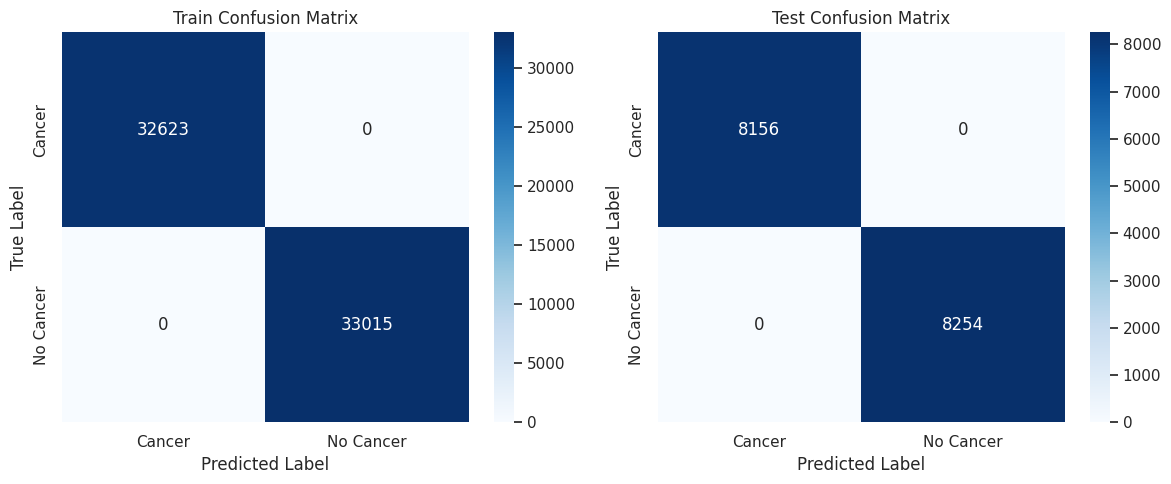

In [94]:

plt.figure(figsize=(12, 5))

# Confusion Matrix - Train
plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Cancer", "No Cancer"],
            yticklabels=["Cancer", "No Cancer"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Train Confusion Matrix")

# Confusion Matrix - Test
plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues",
           xticklabels=["Cancer", "No Cancer"],
            yticklabels=["Cancer", "No Cancer"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Test Confusion Matrix")

plt.tight_layout()
plt.show()

## Voting Classifier

In [95]:
from sklearn.ensemble import VotingClassifier

In [96]:
lr = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

In [97]:
xgb = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [98]:
ensemble = VotingClassifier(
    estimators=[('lr', lr), ('xgb', xgb)],
    voting='soft'
)

In [99]:
ensemble.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [100]:
# Predict on train set
y_train_pred = ensemble.predict(X_train_scaled)
print("=== Train Set Evaluation ===")
print(classification_report(y_train, y_train_pred))

# Predict on test set
y_test_pred = ensemble.predict(X_test_scaled)
print("=== Test Set Evaluation ===")
print(classification_report(y_test, y_test_pred))

=== Train Set Evaluation ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32623
           1       1.00      1.00      1.00     33015

    accuracy                           1.00     65638
   macro avg       1.00      1.00      1.00     65638
weighted avg       1.00      1.00      1.00     65638

=== Test Set Evaluation ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8156
           1       1.00      1.00      1.00      8254

    accuracy                           1.00     16410
   macro avg       1.00      1.00      1.00     16410
weighted avg       1.00      1.00      1.00     16410



## Artificial Neural Network

In [101]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [102]:

X = df[top_features]
y = df["Oral Cancer (Diagnosis)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


History = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=1,callbacks=[early_stop, checkpoint])


y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


I0000 00:00:1747392234.653788      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/20


I0000 00:00:1747392237.536189     106 service.cc:148] XLA service 0x7ad688006c60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747392237.536780     106 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747392237.812699     106 cuda_dnn.cc:529] Loaded cuDNN version 90300


  74/3282 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5121 - loss: 0.6982

I0000 00:00:1747392239.125813     106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3282/3282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9044 - loss: 0.2303
Epoch 1: val_loss improved from inf to 0.05939, saving model to best_model.h5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9044 - loss: 0.2303 - val_accuracy: 0.9807 - val_loss: 0.0594
Epoch 2/20
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0639
Epoch 2: val_loss improved from 0.05939 to 0.03661, saving model to best_model.h5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9832 - loss: 0.0639 - val_accuracy: 0.9894 - val_loss: 0.0366
Epoch 3/20
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.0428
Epoch 3: val_loss improved from 0.03661 to 0.03334, saving model to best_model.h5
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9896 - loss: 0.0428 - val_accuracy: 0.9902 - val_loss: 0.0333
Epoch 4/20
3278/3282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0379
Epoch 4: val_loss improved from 0.03334 to 0.02911, saving 

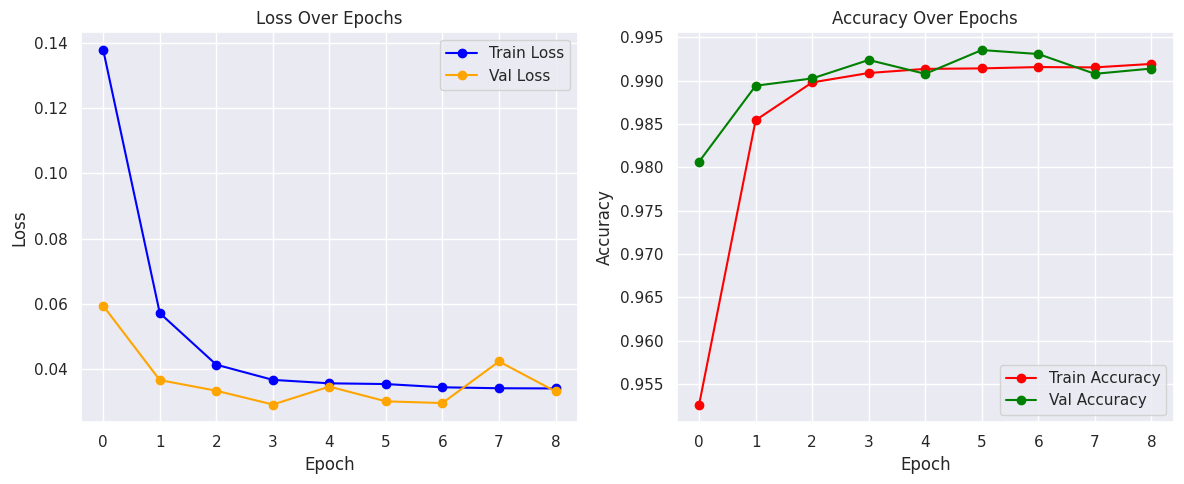

In [103]:
# Plotting training and validation loss and accuracy
plt.figure(figsize=(12, 5))

# 📉 Loss
plt.subplot(1, 2, 1)
plt.plot(History.history['loss'], label='Train Loss', marker='o', color='blue')
plt.plot(History.history['val_loss'], label='Val Loss', marker='o', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 📈 Accuracy
plt.subplot(1, 2, 2)
plt.plot(History.history['accuracy'], label='Train Accuracy', marker='o', color='red')
plt.plot(History.history['val_accuracy'], label='Val Accuracy', marker='o', color='green')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [104]:
model.load_weights('best_model.h5')  # Load best weights from file if needed
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8137
           1       1.00      0.99      0.99      8273

    accuracy                           0.99     16410
   macro avg       0.99      0.99      0.99     16410
weighted avg       0.99      0.99      0.99     16410

